<a href="https://colab.research.google.com/github/amifra8uni/LabCMP/blob/main/Esame_2022_02_11_FrancescoAmicucci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metodi Computazionali per la fisica: [Esame 11 febbraio 2022](https://drive.google.com/file/d/1k1jawMwLePx4OSdDLobmP1iYIIm3a53X/view)

Candidato: Francesco Amicucci 1795152


# Capacitors

**Your exam must be submitted via google classroom by 13:30 as a single `zip` file containing all relevant code files, plots, and datafiles.**

## Important remarks
- C++ evaluation will be based on: correct syntax, proper return types, proper arguments of functions, data members and class interfaces, setters/getters, unnecessary void functions, comments throughout the code, separation of class implementations
and interfaces.
-  Python evaluation will be based on: correct syntax, avoiding C-style loops, using Python features in general, comments throughout the notebook/scripts, labels, legends and plot styling and clarity in general. The Python coding may be carried out in a notebook or in scripts, as you wish.
- The various *.dat output files you produce must be submitted.

Sto usando Google Colaboratory, per cui i dati vengono importati nella cartella `/content/my_sim.dat` per essere letti. Tuttavia a volte i caricamenti dei file non vanno a buon fine, quindi potrei aver fatto ricordo alla seguente soluzione:
1. Carico i dati su una cartella di Google Drive
2. Importo i dati direttamente da Google Drive con la libreria

```python
from google.colab import drive
drive.mount('/content/drive')
```
Dal momento che però ci viene chiesto di consegnare anche i file con i dati delle simulazioni, le parti di codice per Google Drive veranno commentate (anche se sono state usate per i grafici) e sostituite con `/content/my_sim.dat`. 


In [3]:
# Questo mi serve per poter caricare i dati generati con un programma C++ e caricati sul drive
import matplotlib.pyplot as plt # Libreria per i plot
import numpy as np
import scipy.stats as stats
from scipy import optimize as opt  
from google.colab import drive
from google.colab import files  # Libreria per salvare i file
drive.mount('/content/drive')

Mounted at /content/drive


A capacitor is a device that stores electrical energy in an electric field. A capacitor C is characterized by its capacitance $C$ — measured in Farad $[\textrm{F}]$ — which can be linked to the are $A$ of its plates and to their separation $s$ by the formula

$$C = \epsilon_0\epsilon_r\frac{A}{s}$$

where $\epsilon_0 = 8.854\cdot 10^{-12}\textrm{ F/m}$ is the vacuum permittivity, and $\epsilon_r \geq 1$ is the relative permittivity of the material between the plates. By definition, $\epsilon_r = 1$ for vacuum.

**You will have to use C++ to handle capacitors ad objects, produce some data with operations on these objects, and fit and plot such data in Python.**

# Part 1 - C++
1. Design and write a class `Capacitor` with appropiate constructios, setters, and getters.
2. Write an application `app2.cpp` to showcase the methods of the class `Capacitor`.
3. Overload the plus (+) and or (||) operators so that they return a `Capacitor` instance representing the capacitor equivalent to the series and the parallel of two given capacitors, respectively.
4. Write an application `app4.cpp` where you set $C_2 = 10$ pF, and $C_3 = 5$ pF, and $C_4 = 15$ pF, draw $10^3$ random values for $C_1$ from a uniform distribution between $[1,100] \textrm{ pF}$ and determina the set of corresponding $10^3$ equivalent capacities for the configuration below.
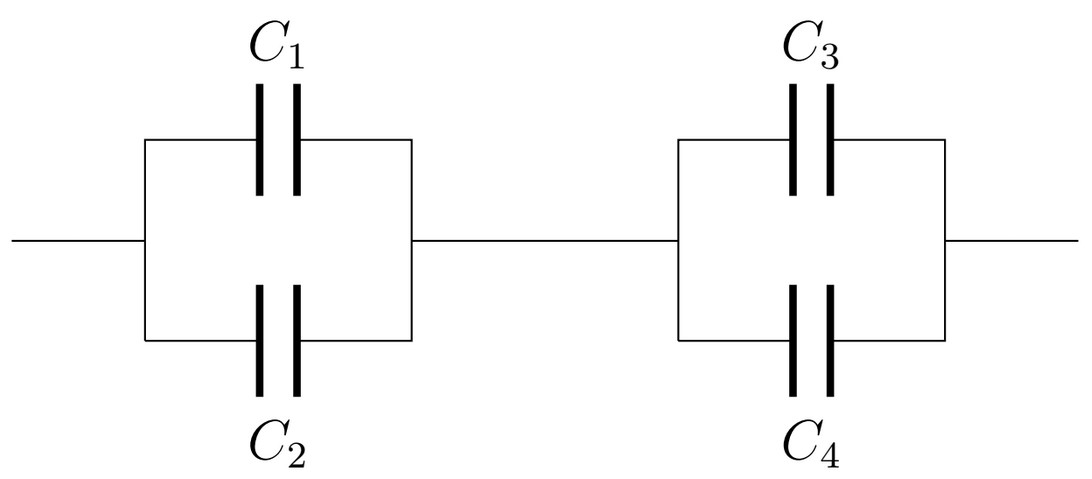

**Note:** If you prefer, you can generate the random $C_1$ values with a Python script, store them ad a text file, and read them in your C++ application `app4.cpp` in order to calculate the $C_{eq}$ values.

Store the values of your $C_1-C_{eq}$ pairs in a textfile called `true.dat`


In [ ]:
## ESEGUI QUESTA CELLA SOLO SE NON HAI I DATI IN C++ ##

C1 = np.random.uniform(low=1, high=100, size=int(1e3)) # In unita' di pF
fname = 'Python_C1.dat'
np.savetxt(fname, C1, delimiter='\t')
#!cat Python_C1.dat #Controllo che mi abbia effettivamente salvato una colonna

# Part 2 - Python
Use Python for the following tasks.
1. Read in the true $C_1-C_{eq}$ values and displace each $C_1$ and $C_{eq}$ by an offset randomly drawn from a Gaussian distribution centered in 0, with standard deviation 0.5. Save these $\tilde{C}_1-\tilde{C}_{eq}$ values in a textfile called `offset.dat`.

- Per fare i plot ho usato il comando `%matplotlib inline`: questo è necessario solo in Jupyter/Google Colab, ma non deve essere usato in un programma Python.
- Anche se è sufficente metterlo una solo volta nel quaderno, l'ho incluso in ogni cella per renderle più indipendenti nel caso volessimo eseguirne solo una.

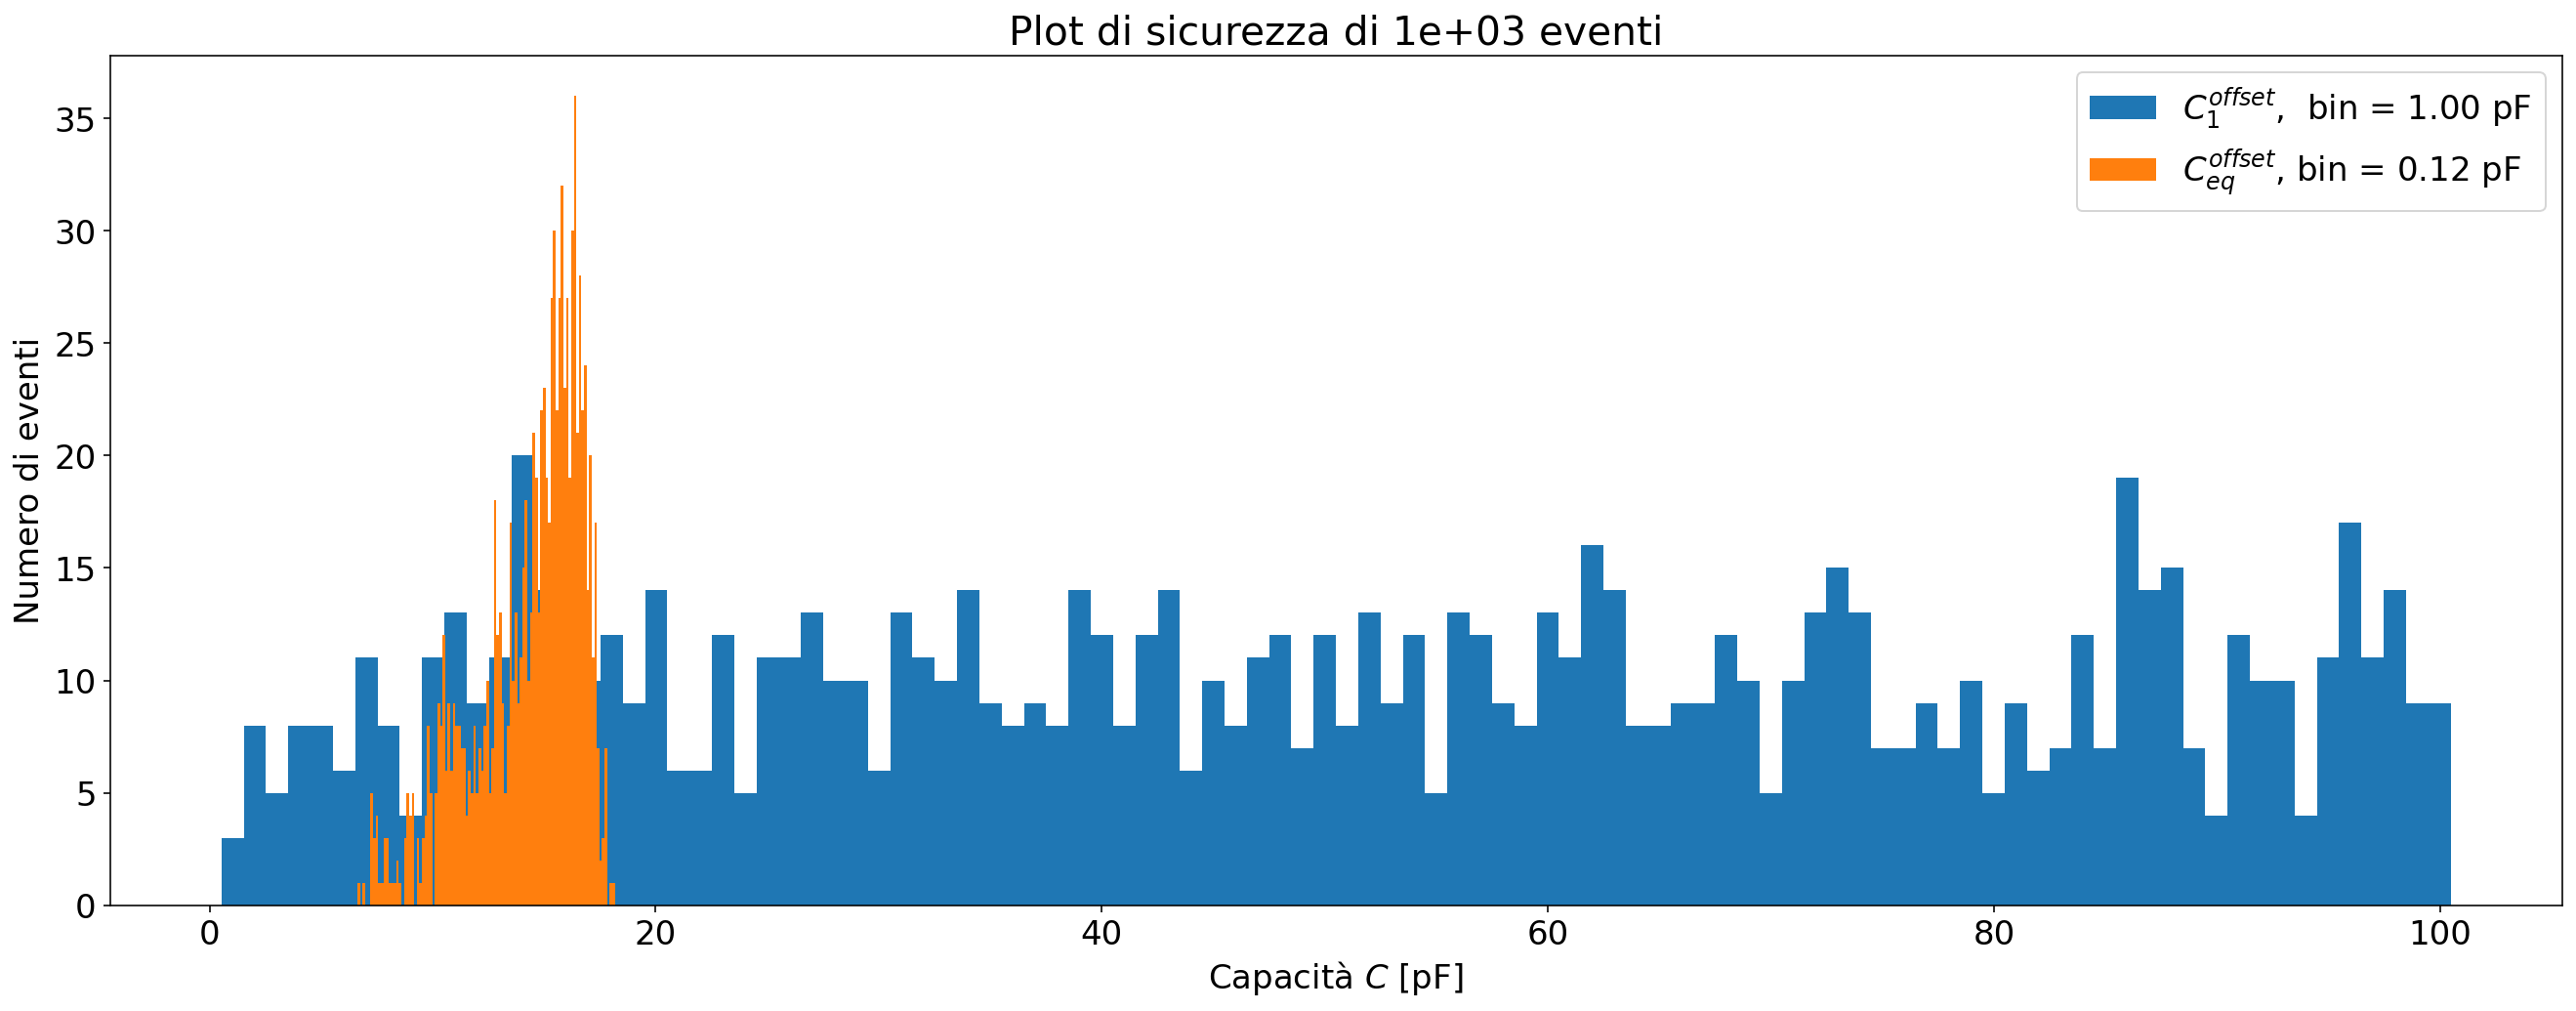

<Figure size 432x288 with 0 Axes>

In [38]:
# Queste sono impostazioni per i grafici
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize = (22.5,8))
plt.rc('font', size = 17) 

# Risultati riproducibili
np.random.seed(seed = 561)

# Importo i valori delle capacita' dal file
dati = '/content/drive/MyDrive/Magistrale/Computing Methods/Esame_2022-02-11/true_exam.dat' # Questi sono quelli dell'esame
#dati = '/content/drive/MyDrive/Magistrale/Computing Methods/Esame_2022-02-11/true.dat'      # Questi sono nuovi

C1, Ceq = np.loadtxt(dati, unpack = True, usecols = (0,1))

# Insert an offset
offset = 0.5
#%time C1_off  = np.array([i + np.random.normal(0, offset) for i in C1] )# La comprehension
#%time Ceq_off = np.array([i + np.random.normal(0, offset) for i in Ceq])# ci mette tempi più lunghi
C1_off  = C1  + np.random.normal(loc=0, scale=offset, size=len(C1) )
Ceq_off = Ceq + np.random.normal(loc=0, scale=offset, size=len(Ceq))

#Questo è quello che erroneamente ho fatto all'esame
#C1_off  = np.array([np.random.normal(i, i*offset) for i in C1] )
#Ceq_off = np.array([np.random.normal(i, i*offset) for i in Ceq])
#print(C1) Controllo

# Verifico che tutto sia andato bene con un plot
n_bin = 100
bin_width = (C1_off.max()-C1_off.min())/n_bin
Ceq_bin_width = (Ceq_off.max()-Ceq_off.min())/n_bin
binned_data, bins, _ = plt.hist(C1_off,  bins = n_bin, log = False, label = '$C_1^{offset}$,  bin = %.2f pF'%(bin_width))
binned_data, bins, _ = plt.hist(Ceq_off, bins = n_bin, log = False, label = '$C_{eq}^{offset}$, bin = %.2f pF'%(Ceq_bin_width))
plt.title("Plot di sicurezza di %.e eventi" % (len(C1_off)))
plt.xlabel(r'Capacità $C$ [pF]')
plt.ylabel(r'Numero di eventi')
plt.legend()
#plt.grid()
plt.show()

# Per salvare il grafico
plt.savefig('Istogramma_C1_Ceq.pdf')
# files.download('costheta.pdf') # Se lo si vuole scaricare

Ma saranno veramente uniformi?

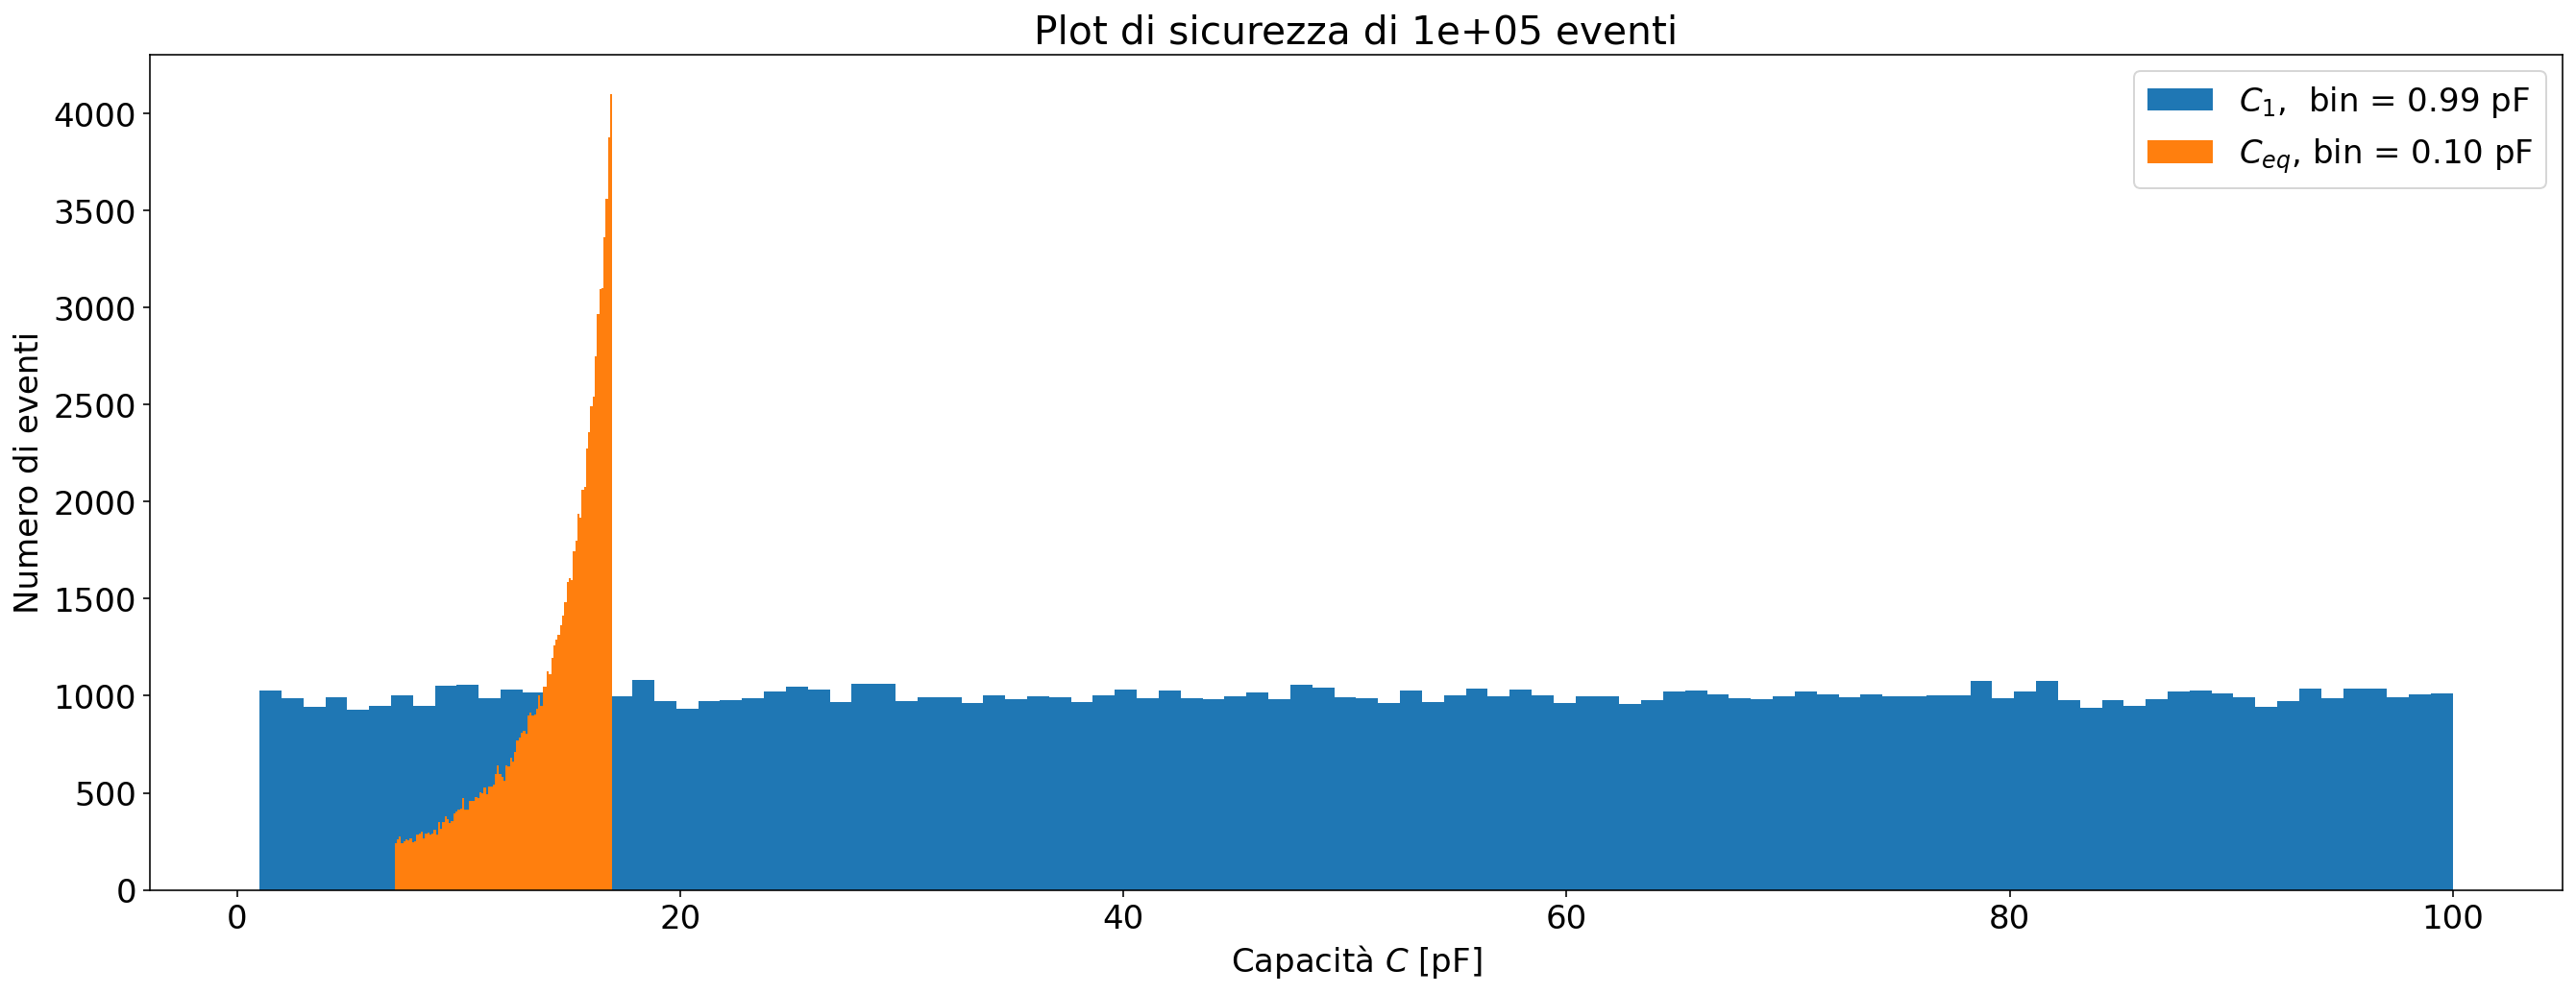

<Figure size 432x288 with 0 Axes>

In [39]:
# Queste sono impostazioni per i grafici
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize = (22.5,8))
plt.rc('font', size = 17) 

dati_test = '/content/drive/MyDrive/Magistrale/Computing Methods/Esame_2022-02-11/true_10e5.dat'  # Questi per vedere se uniformi
C1_test, Ceq_test = np.loadtxt(dati_test, unpack = True, usecols = (0,1))
C1_off_test  = C1_test  + np.random.normal(loc=0, scale=offset, size=len(C1_test) )
Ceq_off_test = Ceq_test + np.random.normal(loc=0, scale=offset, size=len(Ceq_test))

# Verifico che tutto sia andato bene con un plot
n_bin = 100
bin_width_test = (C1_test.max()-C1_test.min())/n_bin
Ceq_bin_width_test = (Ceq_test.max()-Ceq_test.min())/n_bin
binned_data, bins, _ = plt.hist(C1_test,  bins = n_bin, log = False, label = '$C_1$,  bin = %.2f pF'%(bin_width_test))
binned_data, bins, _ = plt.hist(Ceq_test, bins = n_bin, log = False, label = '$C_{eq}$, bin = %.2f pF'%(Ceq_bin_width_test))
plt.title("Plot di sicurezza di %.e eventi" % (len(C1_test)))
plt.xlabel(r'Capacità $C$ [pF]')
plt.ylabel(r'Numero di eventi')
plt.legend()
#plt.grid()
plt.show()

# Per salvare il grafico
plt.savefig('Istogramma_C1_Ceq.pdf')
# files.download('costheta.pdf') # Se lo si vuole scaricare

Per convincermi ancora di più della bontà dei dati ho stampato i valori massimi e minimi della mia distribuzione uniforme

In [40]:
if C1_test.min() >=1 and C1_test.max() <= 100:
  print("Complimenti, i tuoi valori rientrano nell'intervallo [1,100] pF")
print(C1_test.max())
print(C1_test.min())

Complimenti, i tuoi valori rientrano nell'intervallo [1,100] pF
99.9996
1.00287


In [41]:
# Salvo i valori
fname = 'offset.dat'
#np.savetxt(fname, (C1_off, Ceq_off), delimiter='\t')              # "columns" get written to lines
np.savetxt(fname, np.transpose([C1_off, Ceq_off]), delimiter='\t') # Per salvare i dati in due colonne
#!cat offset.dat                                                   #Controllo come me li abbia effettivamente salvati

2. Use [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to fit the function $\frac{1}{\frac{1}{x+a}+b}$ to the $\tilde{C}_1-\tilde{C}_{eq}$ data. How do the results for $a$ and $b$ compare to your expectations? Plot your data and the result of your fit.

## Fit della mia funzione

La funzione da fittare è $1/[1/(x+a)+b]$, mi aspetto quindi che 
$$ 
\begin{cases}
x=C_{eq}\\
a=C_2 \\
b=(C_3||C_4)^{-1}
\end{cases}
$$
Userò quindi come valori inziiali

$a_0 = 10 \textrm{ pF}$

$b_0 = 1/(5+15) \textrm{ pF}^{-1} = 0.05 \textrm{ pF}^{-1}$

In [42]:
# definisco la mia funzione per il fit
def func(x, a, b):
  return 1 / (1/(x+a)+b)

param_labels = ['a', 'b']

### Plot funzione fit

Come controllo di sicurezza, grafico la funzione che voglio fittare per vedere se è stata implementata in maniera corretta.

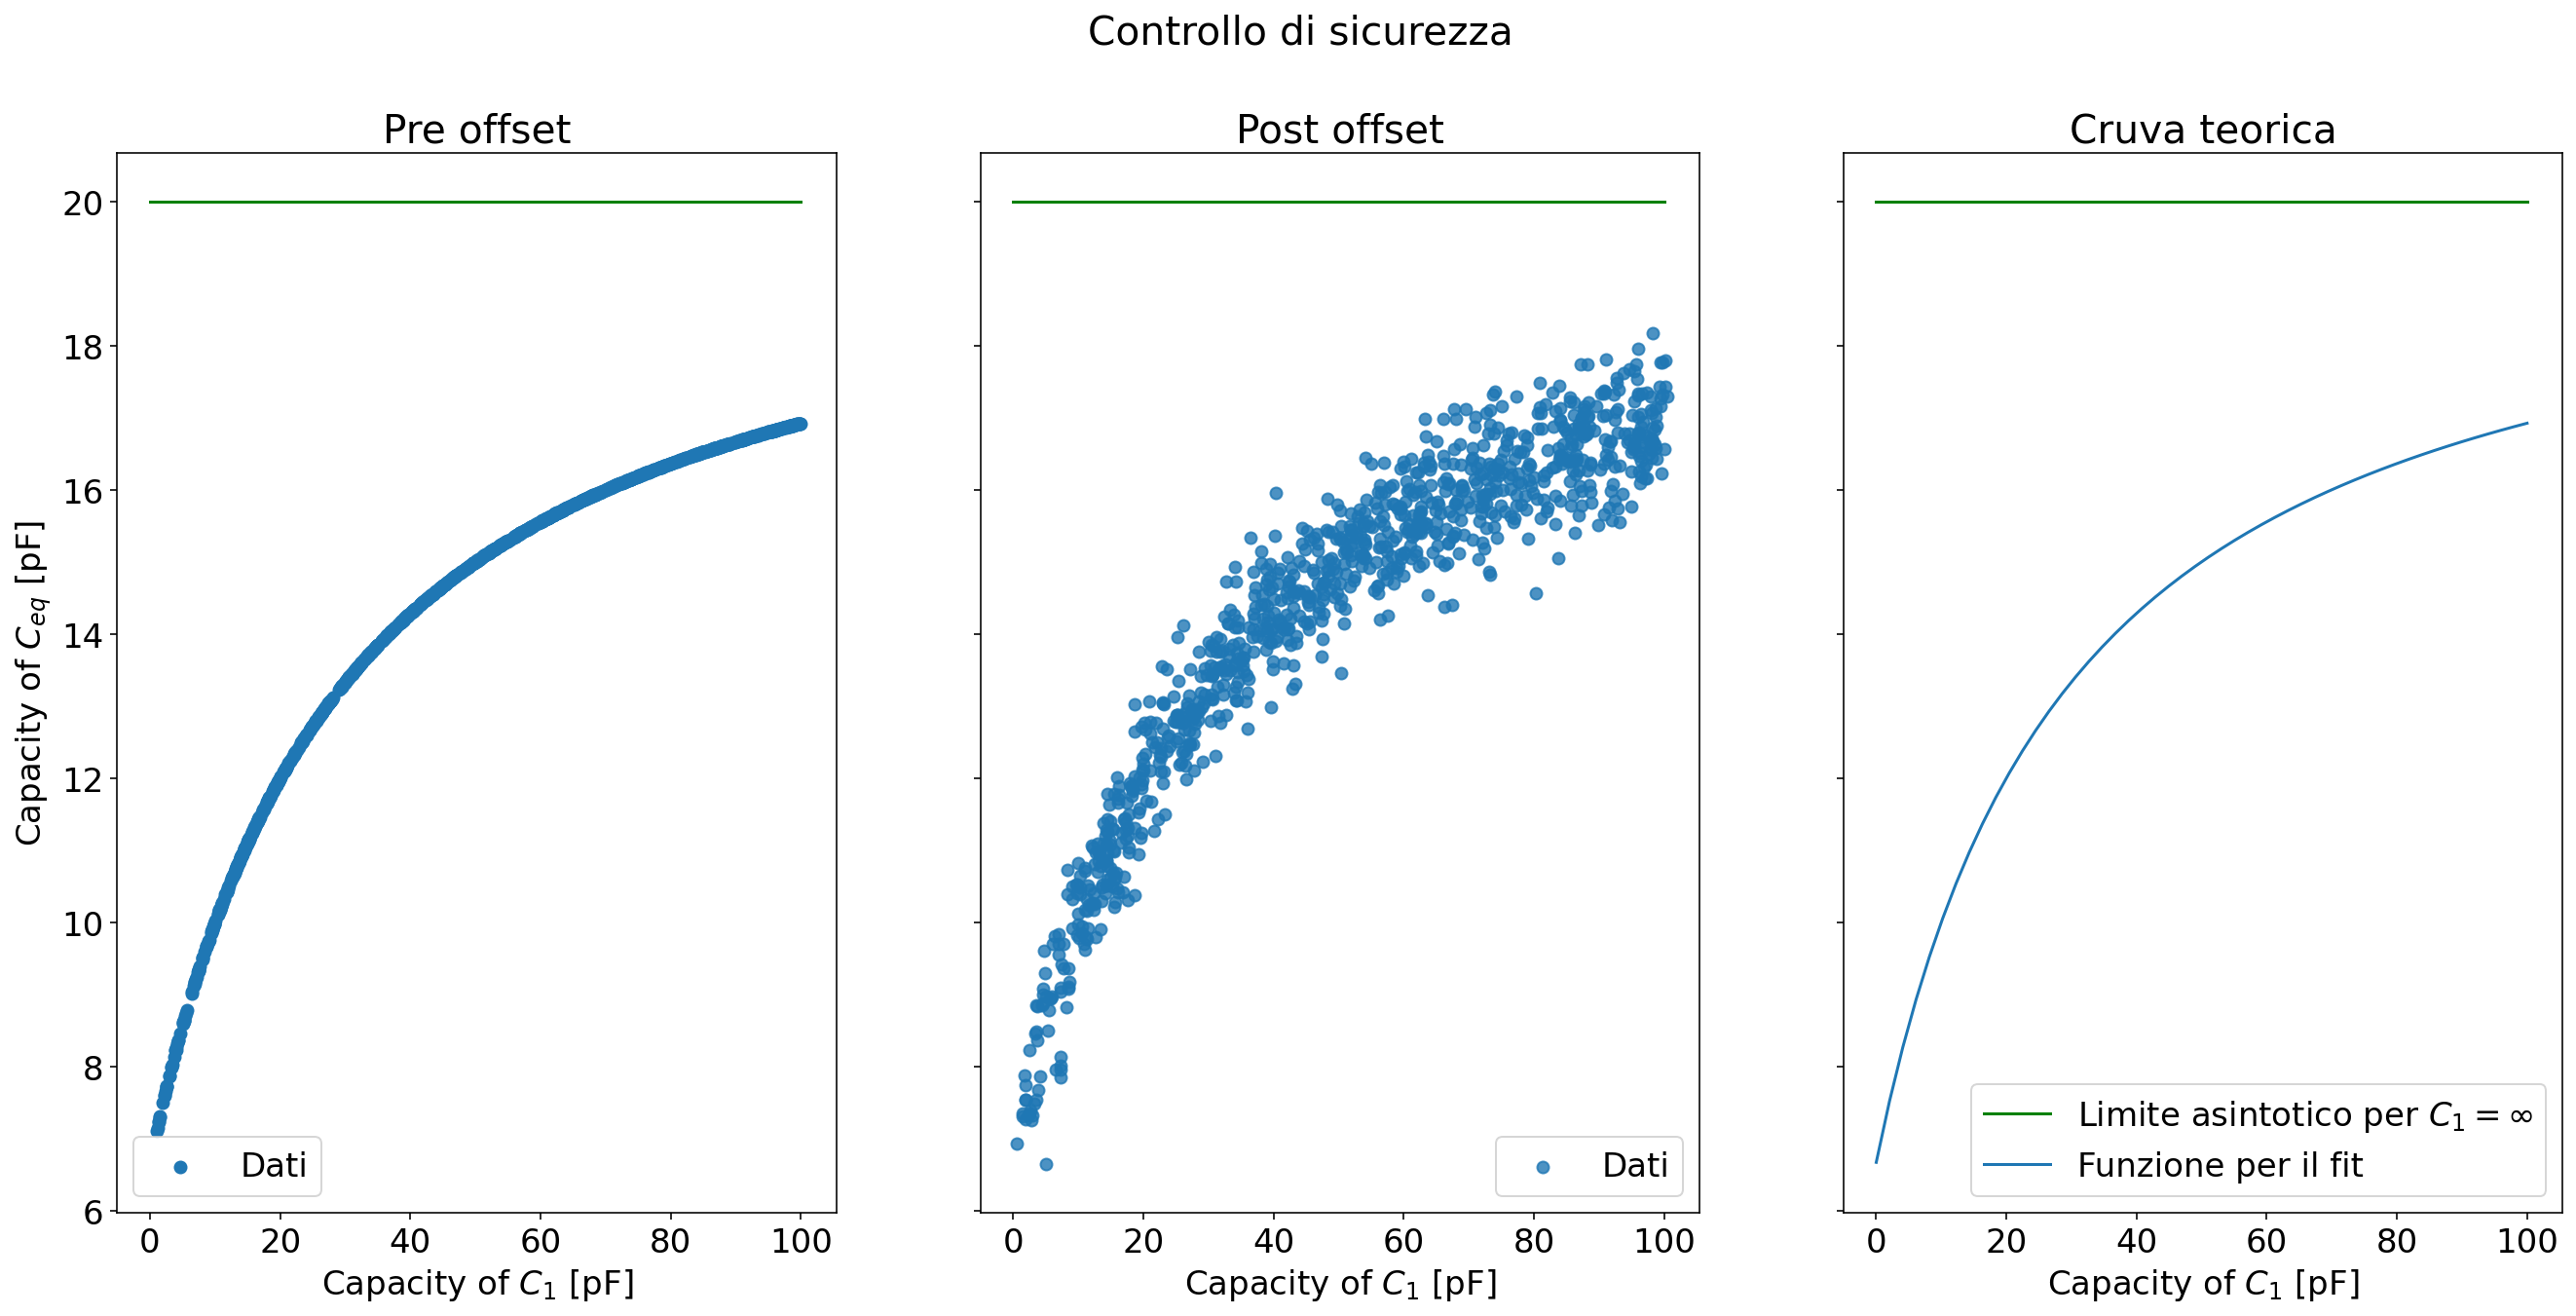

In [43]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.rc('font', size=17) 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(22.5,10))
x0 = np.linspace(0,100)

# Questi sono i miei dati prima dell'off set, vedo se seguono la curva teorica
ax1.title.set_text('Pre offset')
ax1.plot(x0, 20*np.ones((len(x0))), color = "green")
ax1.scatter(C1, Ceq, label="Dati")
ax1.legend()

# Questi dopo l'offset
ax2.title.set_text('Post offset')
ax2.plot(x0, 20*np.ones((len(x0))), color = "green")
ax2.scatter(C1_off, Ceq_off, label = "Dati", alpha = 0.8)
ax2.legend()

# Questa è la curva del fit
a0 = 10
b0 = 0.05
ax3.title.set_text('Cruva teorica')
ax3.plot(x0, 20*np.ones((len(x0))), label = "Limite asintotico per $C_1 = \infty$", color = "green")
ax3.plot(x0, func(x0, a0, b0), label = "Funzione per il fit")
ax3.legend()
fig.suptitle("Controllo di sicurezza")

ax1.set(xlabel = r'Capacity of $C_1$ [pF]', ylabel = r'Capacity of $C_{eq}$ [pF]')
for ax in (ax2, ax3):
  ax.set(xlabel = r'Capacity of $C_1$ [pF]')

# Per salvare il grafico
plt.savefig('Sanity_check_offset.pdf')
# files.download('Sanity_check_offset.pdf') # Se lo si vuole scaricare

### Parametri iniziali per il fit

It is always a good practice to provide some initial values for the parameters to be fitted. Initial values are passed to [optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) with the argument `p0`:
```python
pars, pars_cov = opt.curve_fit(..., p0=[a0, b0])
```

Recall that `pars` is the list of fitted parameters (in the order they appear in the definition of the fit function) and `pars_cov` is their covariance matrix that can be used to compute the uncertainty on each fitted parameter.

In [44]:
a0 = 10
b0 = 0.05
pars_no_off, pars_cov_no_off = opt.curve_fit(func, xdata = C1, ydata = Ceq, p0=[a0, b0])

### Parameteri fittati

In [45]:
print('\n==== parametri del fit ===\n', pars_no_off)
print('\n==== matrice di covarianza ===\n', pars_cov_no_off)

print("\n")

print("(",pars_no_off[0], "+/-", pars_cov_no_off[0,0]**0.5, ") pF")
print("(",pars_no_off[1], "+/-", pars_cov_no_off[1,1]**0.5, ") pF^-1")


==== parametri del fit ===
 [10.00000483  0.05      ]

==== matrice di covarianza ===
 [[7.19214729e-11 2.24254796e-14]
 [2.24254796e-14 2.37410441e-17]]


( 10.000004833803493 +/- 8.480652859013632e-06 ) pF
( 0.04999999797223564 +/- 4.872478230871477e-09 ) pF^-1


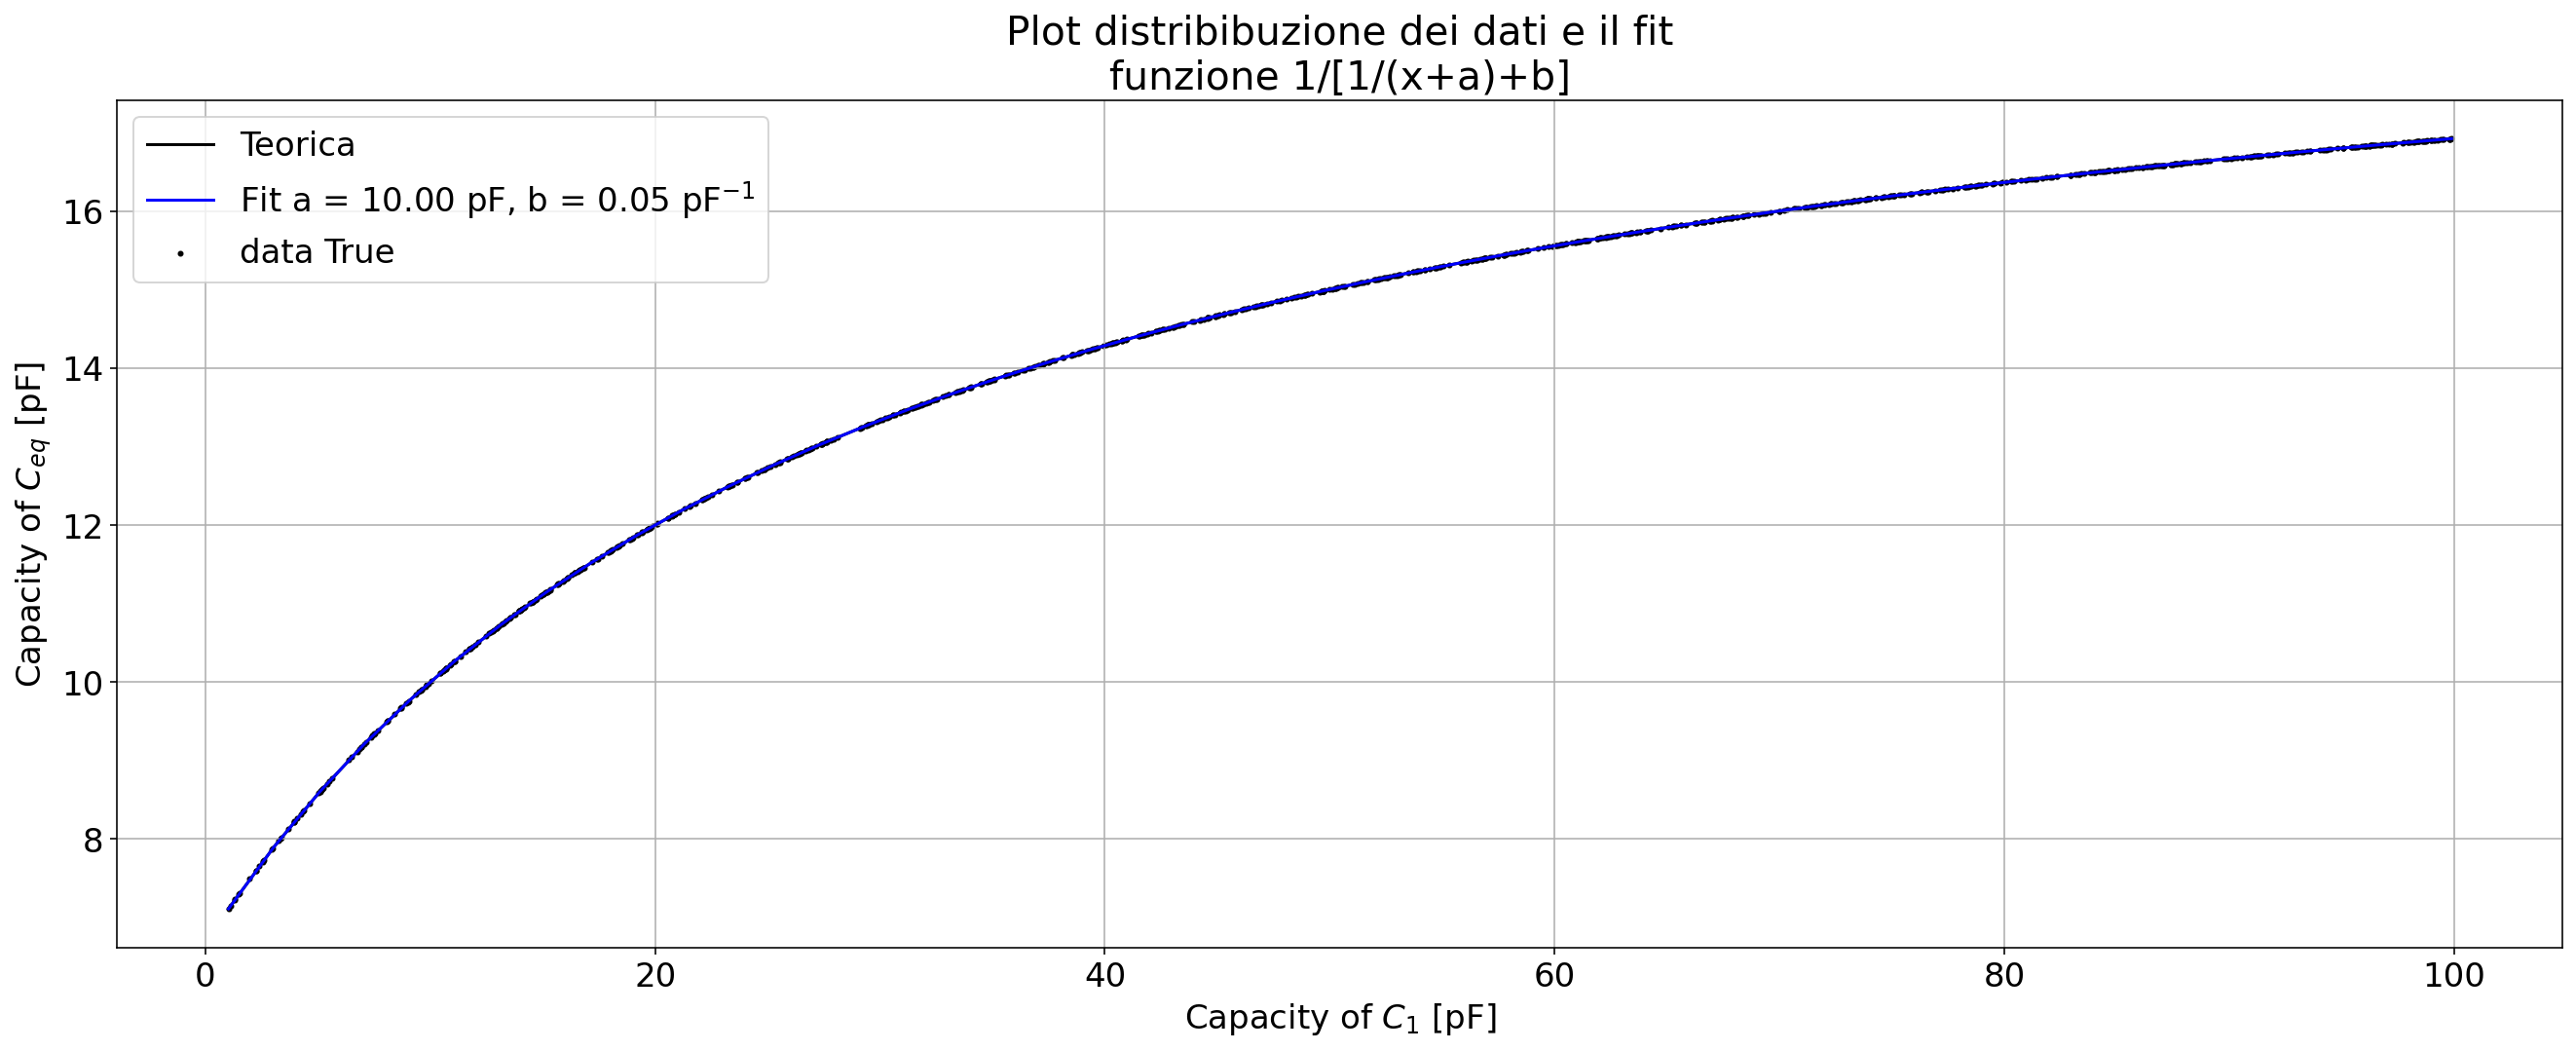

<Figure size 432x288 with 0 Axes>

In [46]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(22.5,8))
plt.rc('font', size=17) 

x0 = np.linspace(C1.min(),C1.max())
plt.scatter(C1, Ceq, label = "data True", s = 4, color = "black")
plt.plot(x0, func(x0, a0, b0), label = "Teorica", color = "black")
plt.plot(x0, func(x0, *pars_no_off), label = "Fit a = %.2f pF, b = %.2f pF$^{-1}$" % tuple(pars_no_off), color = "blue")
plt.title("Plot distribibuzione dei dati e il fit\nfunzione 1/[1/(x+a)+b]")
plt.xlabel("Capacity of $C_1$ [pF]")
plt.ylabel('Capacity of $C_{eq}$ [pF]')
plt.grid()
plt.legend()
plt.show()

# Per salvare il grafico
plt.savefig('Fit_senza_offset.pdf')
# files.download('Fit_senza_offset.pdf') # Se lo si vuole scaricare


==== fitted parameters ===
 [9.87192725 0.05002541]

==== covariance matrix ===
 [[2.46498917e-02 7.71915208e-06]
 [7.71915208e-06 8.24671625e-09]]


 1.6% error on parameter a
( 9.871927254722761 +/- 0.1570028398402634 ) pF
 0.2% error on parameter b
( 0.050025408804931296 +/- 9.08114323963915e-05 ) pF


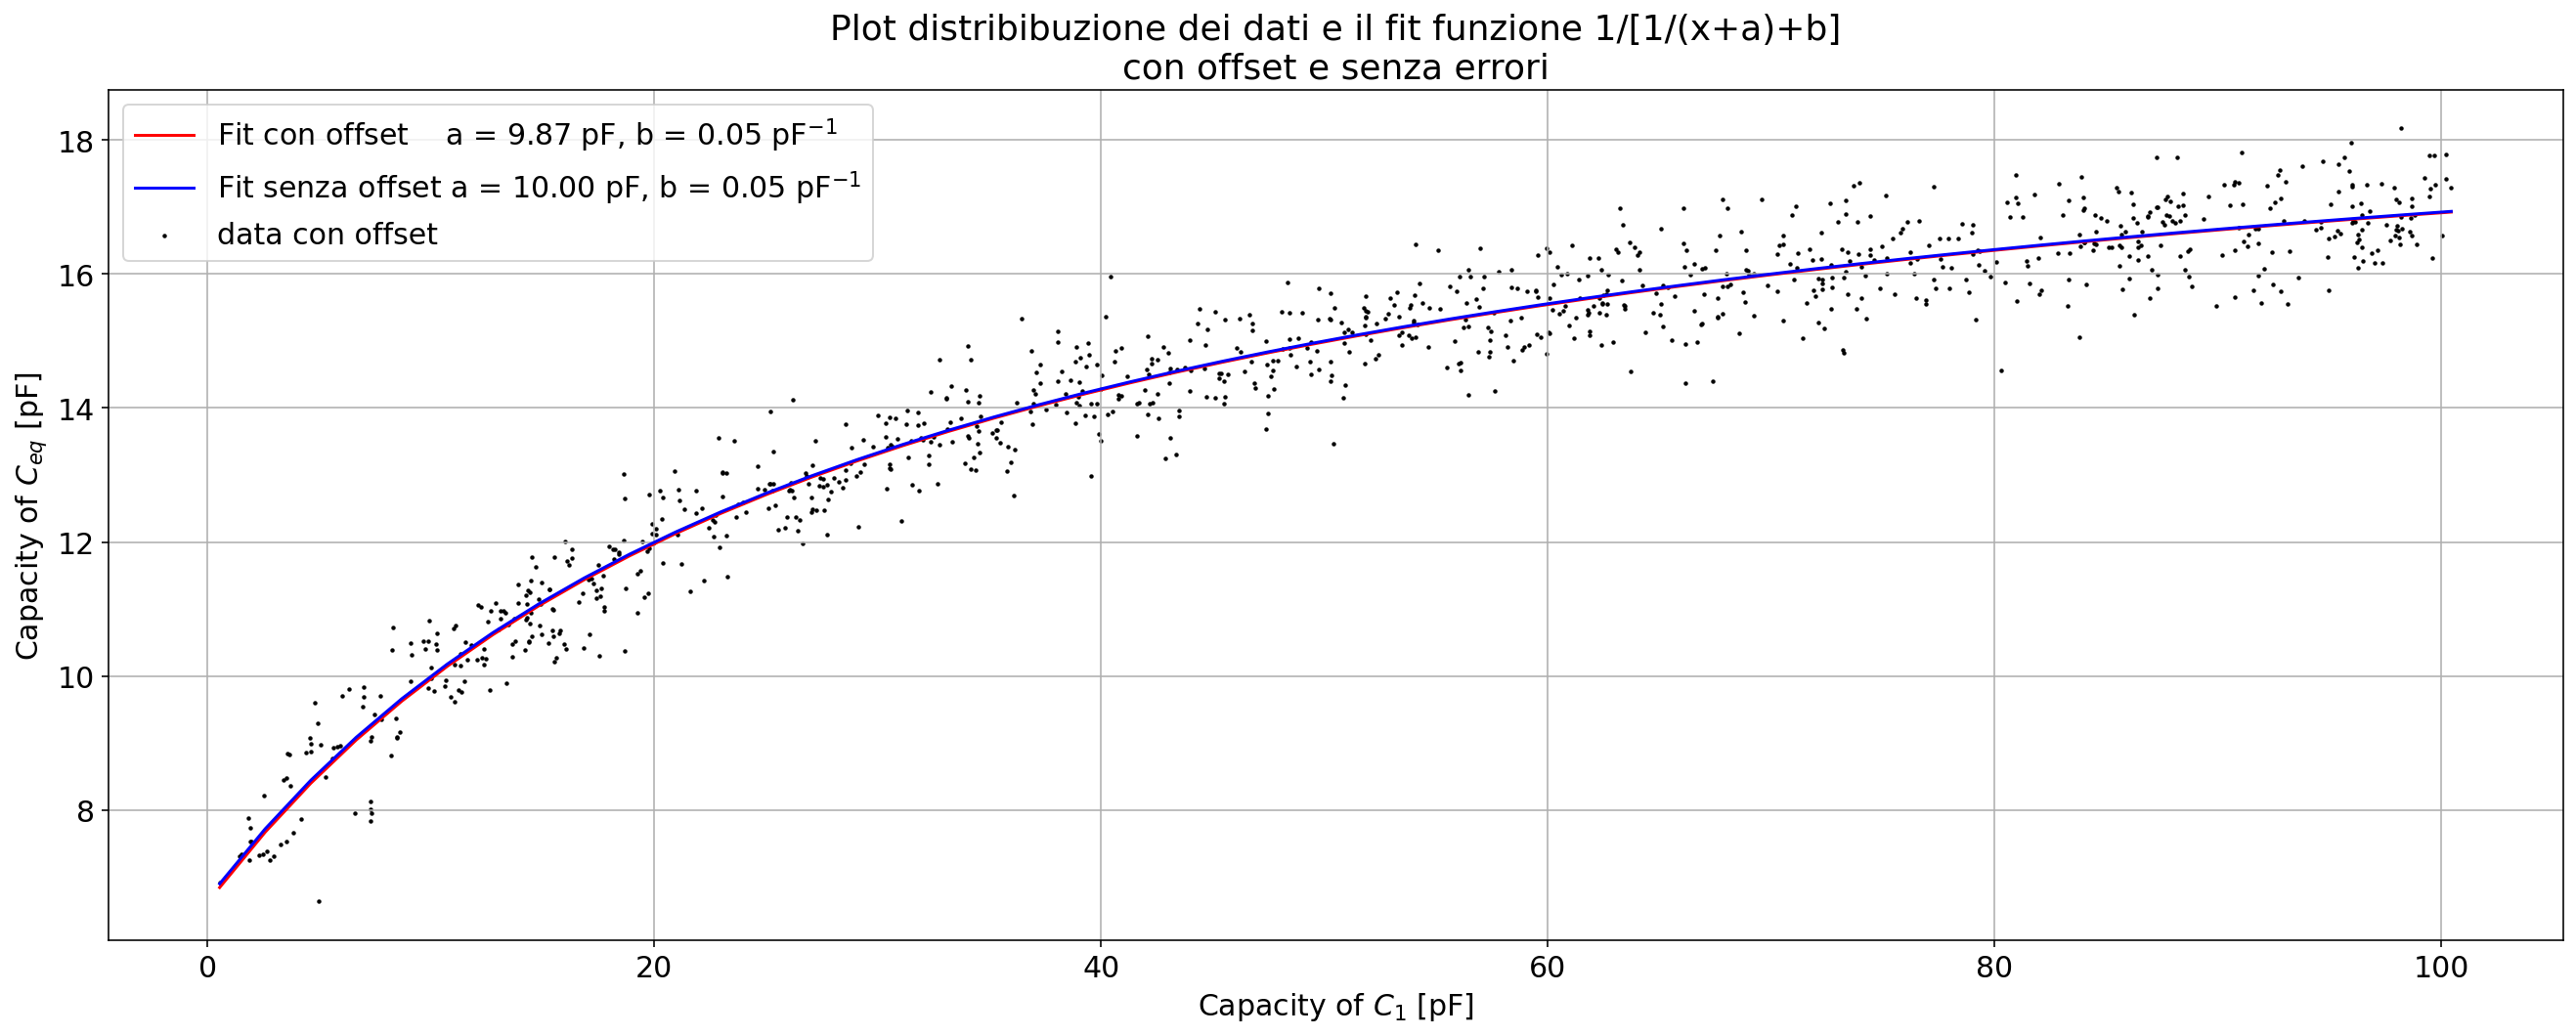

<Figure size 432x288 with 0 Axes>

In [47]:
# Ora che so che funziona, ripeto tutto però con l'offset

%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(22.5,8))
plt.rc('font', size=15) 

a0 = 10
b0 = 0.05
pars, pars_cov = opt.curve_fit(func, xdata = C1_off, ydata = Ceq_off, p0=[a0, b0])
pars_no_off, pars_cov_no_off = opt.curve_fit(func, xdata = C1, ydata = Ceq, p0=[a0, b0])

print('\n==== fitted parameters ===\n', pars)
print('\n==== covariance matrix ===\n', pars_cov)

print('\n')
for i in range(len(pars)):
  print("{0: .1f}% error on parameter {1}".format(np.abs(100*pars_cov[i, i]**0.5/pars[i]), param_labels[i]))
  print("(",pars[i], "+/-", pars_cov[i,i]**0.5, ") pF")

x = np.linspace(C1_off.min(),C1_off.max())
plt.scatter(C1_off, Ceq_off, label = "data con offset", s = 1.5, color = "black")
plt.plot(x, func(x, *pars),        label = "Fit con offset    a = %.2f pF, b = %.2f pF$^{-1}$" % tuple(pars),        color = "red")
plt.plot(x, func(x, *pars_no_off), label = "Fit senza offset a = %.2f pF, b = %.2f pF$^{-1}$"  % tuple(pars_no_off), color = "blue")
plt.title("Plot distribibuzione dei dati e il fit funzione 1/[1/(x+a)+b]\ncon offset e senza errori")
plt.xlabel("Capacity of $C_1$ [pF]")
plt.ylabel('Capacity of $C_{eq}$ [pF]')
plt.grid()
plt.legend()
plt.show()

# Per salvare il grafico
plt.savefig('Fit_con_offset.pdf')
#files.download('Fit_con_offset.pdf') # Se lo si vuole scaricare

3. Read in the true $C_{eq}$ values and this time associate an error value $\Delta C_{eq}$ to each $C_{eq}$ by randomly drawing from a Gaussian distribution centered in 0, with standard deviation 3. Save these values in the textfile `errorbar.dat`.

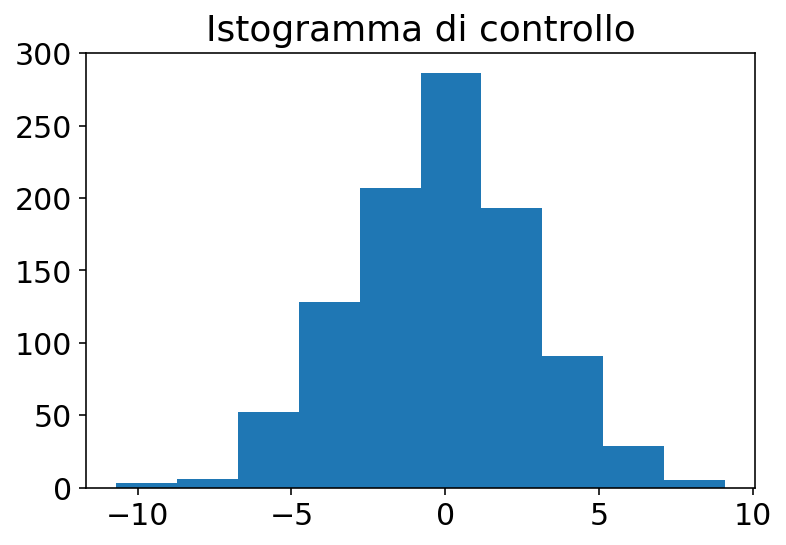

In [48]:
C_err = np.random.normal(0, 3, len(Ceq))

# Istogramma di controllo
plt.hist(C_err)
plt.title("Istogramma di controllo")
#Salvo i valori
fname = 'errorbar.dat'
np.savetxt(fname, C_err, delimiter='\t')
#!cat errorbar.dat #Controllo

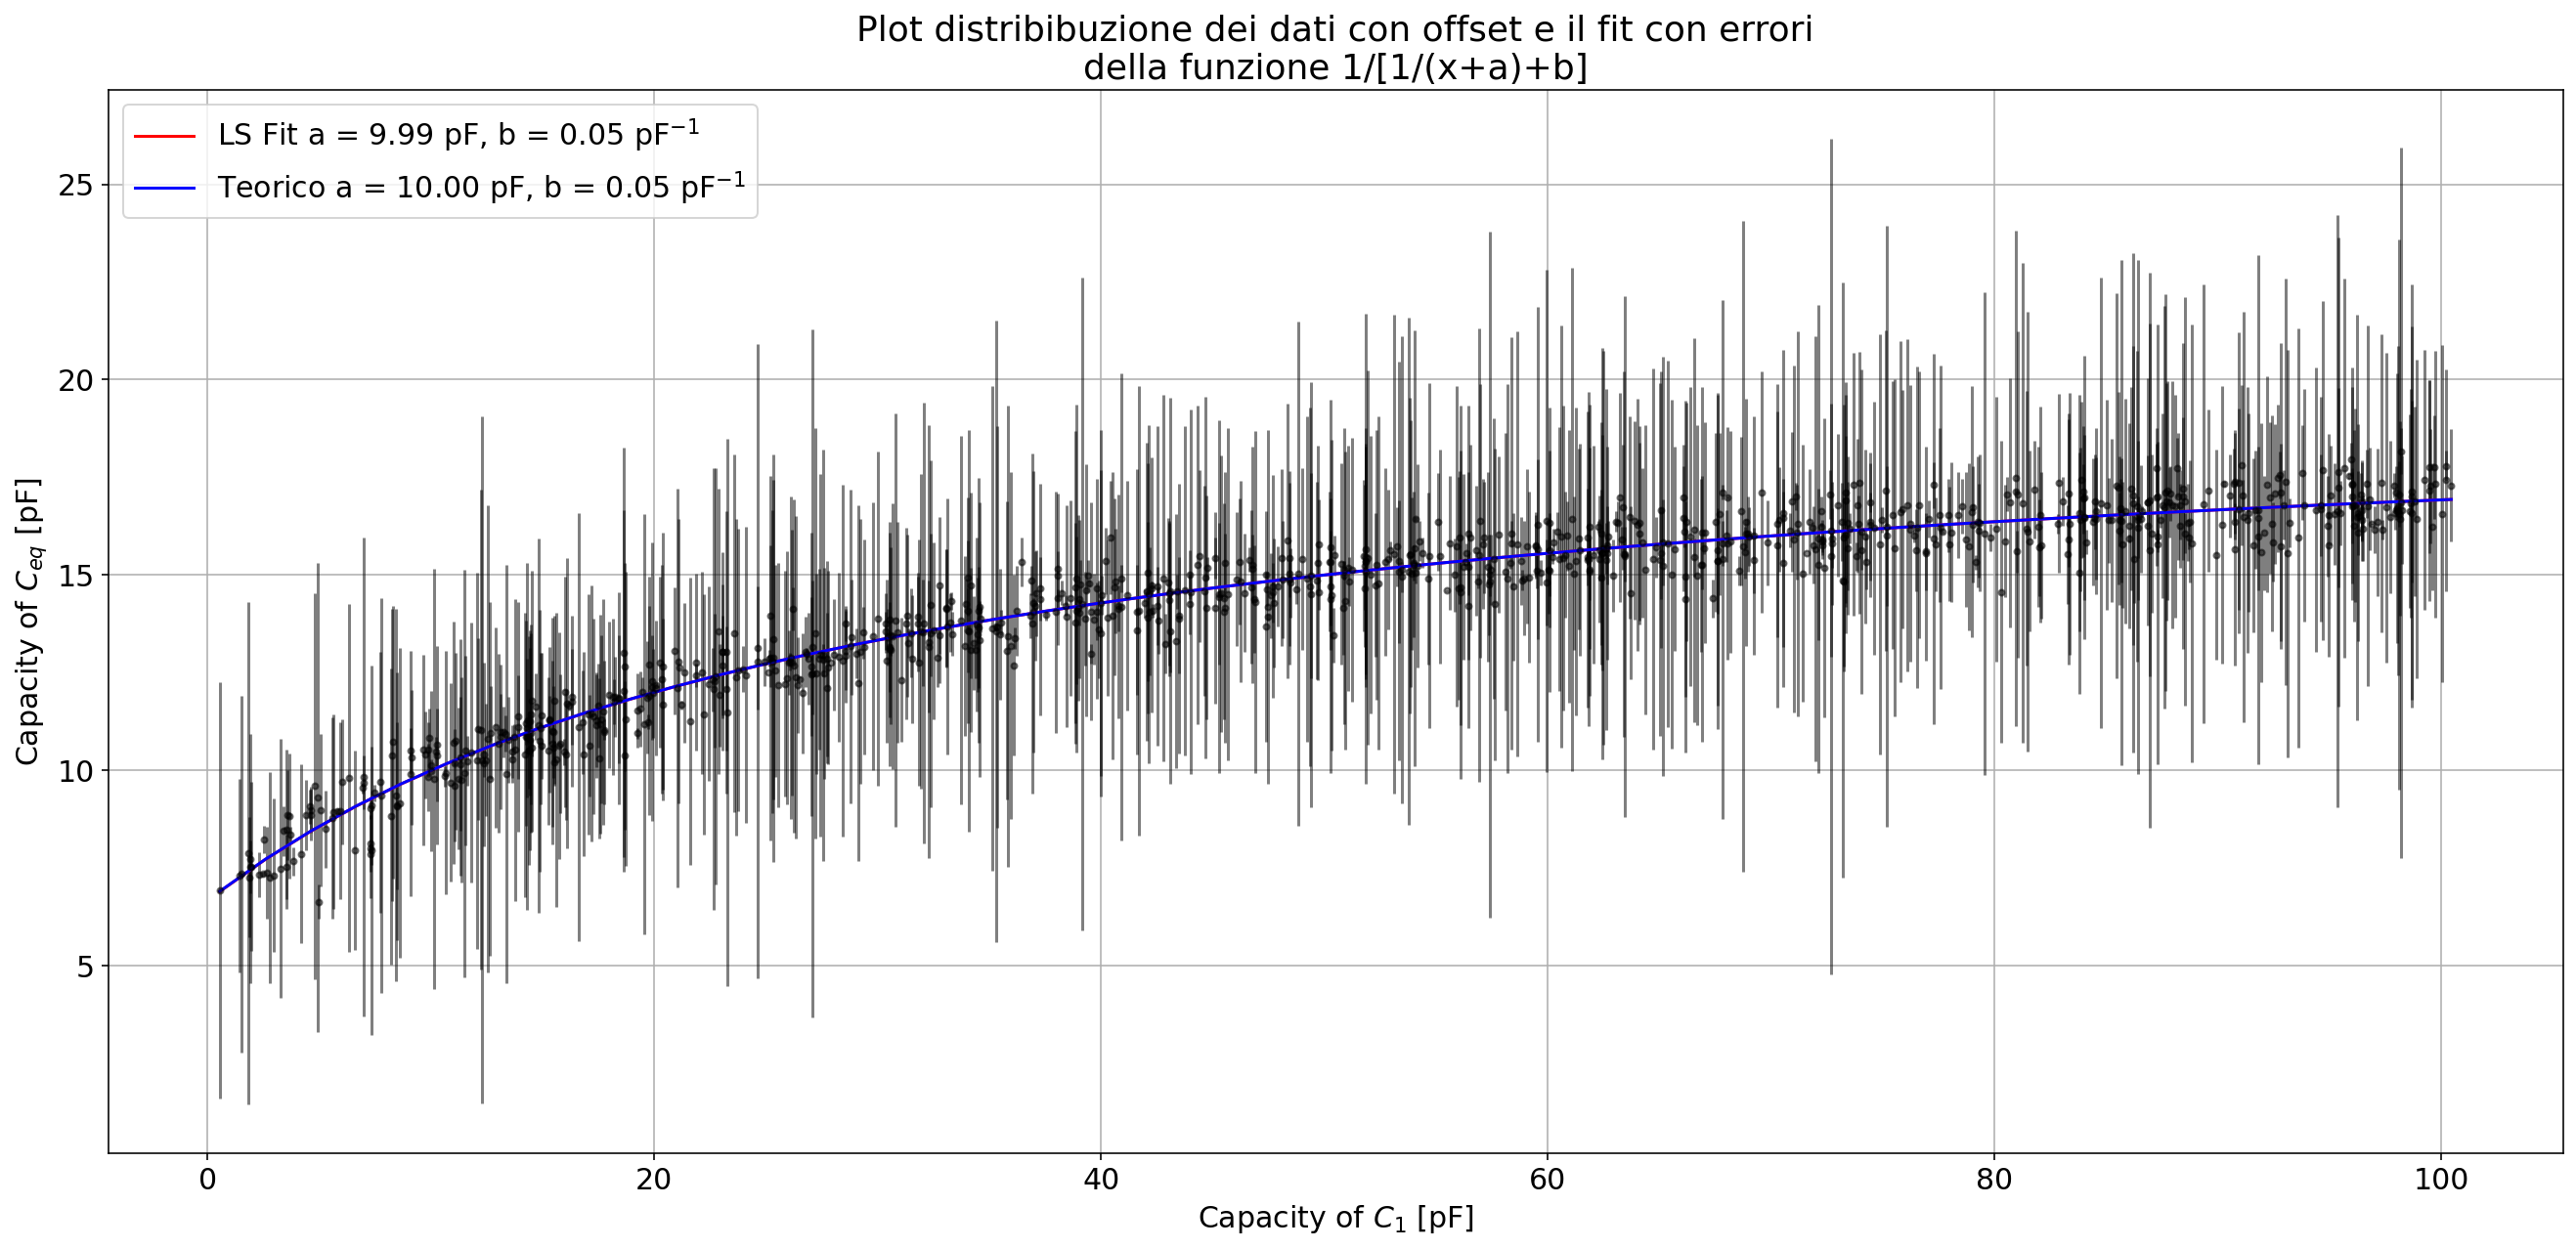

<Figure size 432x288 with 0 Axes>

In [49]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(22.5,10))
plt.rc('font', size=15) 

pars, pars_cov = opt.curve_fit(func, xdata = C1_off, ydata = Ceq, sigma = C_err, p0=[a0, b0])

plt.errorbar(C1_off, Ceq_off, yerr=C_err, fmt=".k", capsize=0, alpha = 0.5)
x0 = np.linspace(C1_off.min(), C1_off.max())
#plt.plot(x0, 20*np.ones((len(x0))), label = "Limite asintotico per $C_1 = \infty$", color = "green")
plt.plot(x0, func(x0, *pars), label = "LS Fit a = %.2f pF, b = %.2f pF$^{-1}$" % tuple(pars), color = "red")
plt.plot(x0, func(x0, a0, b0), label = "Teorico a = %.2f pF, b = %.2f pF$^{-1}$" % (a0, b0),  color = "blue")
plt.title("Plot distribibuzione dei dati con offset e il fit con errori\ndella funzione 1/[1/(x+a)+b]")
plt.xlabel("Capacity of $C_1$ [pF]")
plt.ylabel('Capacity of $C_{eq}$ [pF]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

# Per salvare il grafico
plt.savefig('Fit_con_errore.pdf')
#files.download('Fit_con_errore.pdf') # Se lo si vuole scaricare

4. Use a Monte Carlo package of your choice to fit the $\tilde{C}_1$ vs $\tilde{C}_{eq} \pm \Delta C_{eq}$ data with the
function $\frac{1}{\frac{1}{x+a}+b}$. How do the results for a and b compare to your expectations? Plot the posterior distributions for a and b and comment your results.

## Metodo della massima verosimiglianza

In [50]:
!pip install emcee

Il metodo dei minimi quadrati è equivalente al metodo della massima verosimiglianza quando le barre di errore sono assunte come corrette, gaussiane e indipendenti. In caso contrario, dobbiamo scrivere noi manualmente la funzione di verosimiglianza e ottimizzarla numericamente.

emcee usa i logaritmi delle densità di probabilità, quindi useremo il logaritmo della massima verosimiglianza e useremo una gaussiana:
$$
\ln \mathcal{L}(\mathbf{d}|\boldsymbol{\theta}) = \ln p(\mathbf{x}, \mathbf{y}, \boldsymbol{\sigma}| a,b) = -{1\over 2}\sum_k\left[ {{\left(y_k - \frac{1}{\frac{1}{x+a}+b}\right)^2}\over {s_k^2}} + \ln (2\pi s_k^2)\right]
$$
con
$$
s_k^2 = \sigma_k^2 \,.
$$

In [51]:
import emcee

pars, pars_cov = opt.curve_fit(func, xdata = C1_off, ydata = Ceq, sigma = C_err, p0=[a0, b0])

# Questa è la funziona di verosimiglianza logaritmica
# theta è la lista di parametri
def log_likelihood(theta, x, y, yerr):
    a, b = theta
    model = 1 / (1/(x+a)+b)
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Minimizziamo $-\ln\mathcal{L}(\mathbf{d}|\boldsymbol{\theta})$ con `scipy.optimize.minimize` (invece di massimizzare $\ln\mathcal{L}(\mathbf{d}|\boldsymbol{\theta})$)

False
Desired error not necessarily achieved due to precision loss.
Maximum likelihood estimates:
a = 9.9864 (True: 10.0000)
b = 0.0500 (True: 0.0500)


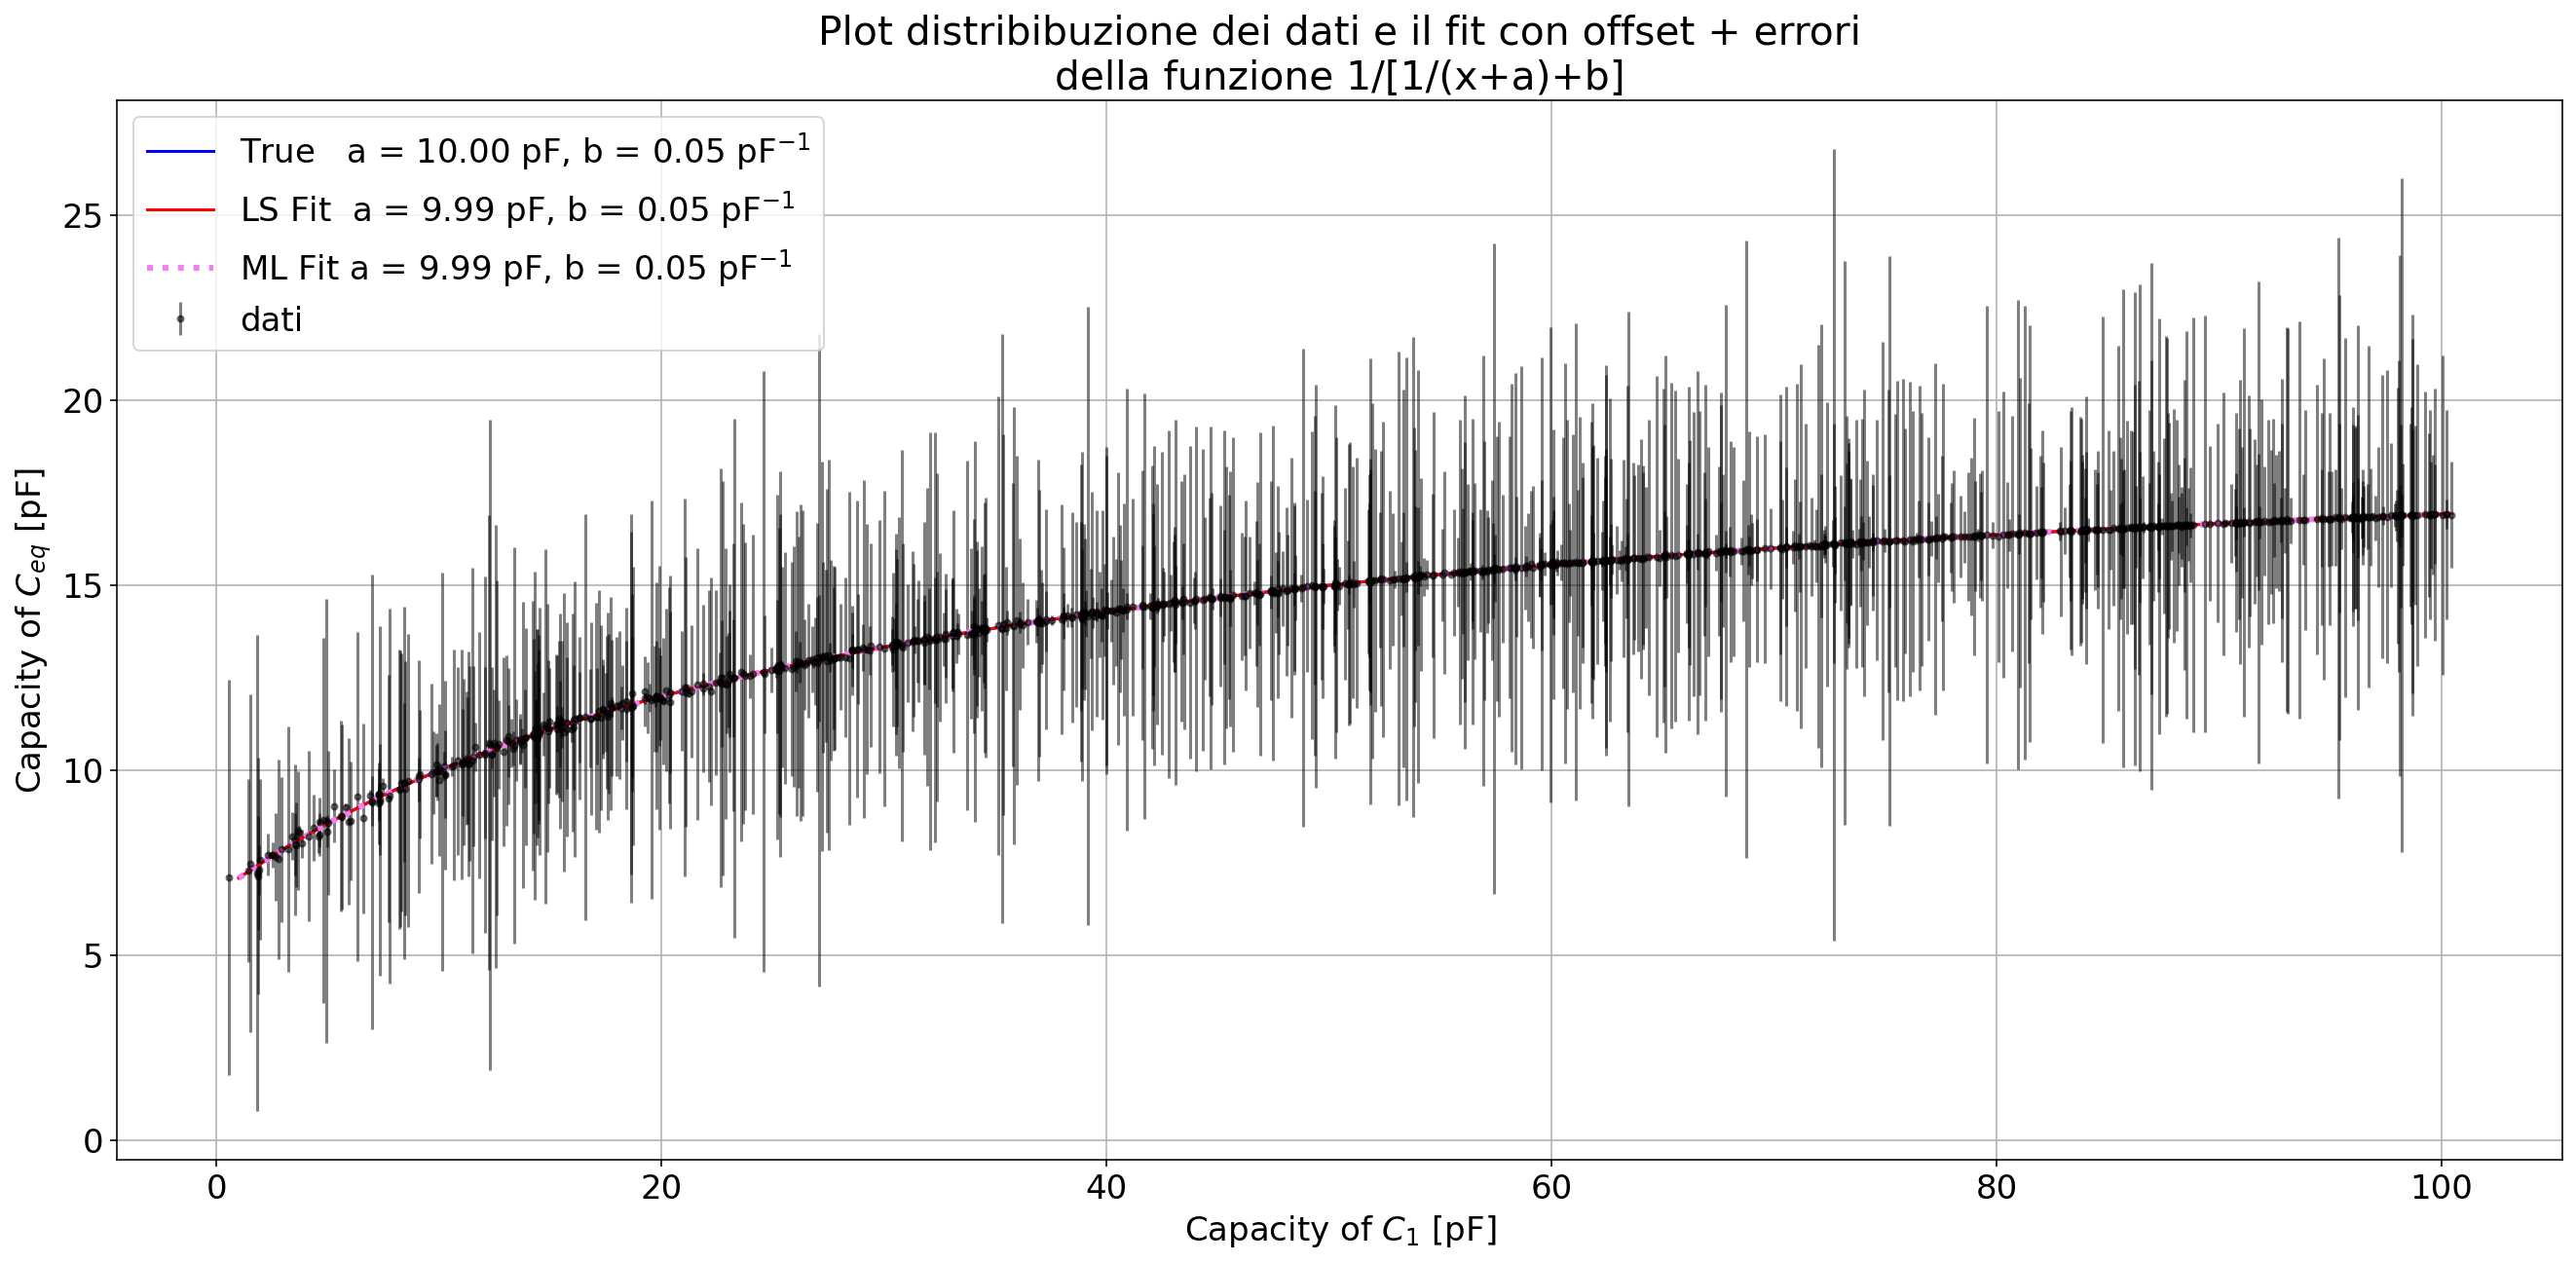

<Figure size 432x288 with 0 Axes>

In [52]:
from scipy.optimize import minimize
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(22.5,10))
plt.rc('font', size=17) 

# Funzione da minimizzare
nll = lambda *args: -log_likelihood(*args)

# Initial guess for the parameters (make it imperfect with Gaussian noise)
initial = np.array([a0, b0]) + 0.1 * np.random.randn(2)

# Solve by minimization of -log-likelihood!
soln = minimize(nll, initial, args=(C1_off, Ceq, C_err)) # We do not have to pass theta here

# Check it converged
print(soln.success)
print(soln.message)

# Extract maximum likelihood parameter values
a_ml, b_ml = soln.x
print("Maximum likelihood estimates:")
print("a = {0:.4f} (True: {1:.4f})".format(a_ml, a0))
print("b = {0:.4f} (True: {1:.4f})".format(b_ml, b0))

# Plot all together
x0 = np.linspace(1,C1_off.max())
plt.errorbar(C1_off, Ceq, yerr=C_err, fmt=".k", capsize=0, alpha = 0.5, label = "dati")
plt.plot(x0, func(x0, *pars_no_off),     label="True   a = %.2f pF, b = %.2f pF$^{-1}$"   % tuple(pars_no_off), color = "blue")
plt.plot(x0, func(x0, *pars),            label="LS Fit  a = %.2f pF, b = %.2f pF$^{-1}$" % tuple(pars),        color = "red")
plt.plot(x0, func(x0, a_ml, b_ml), ":k", label="ML Fit a = %.2f pF, b = %.2f pF$^{-1}$"   % (a_ml, b_ml),       color = "violet", linewidth=3)
plt.title("Plot distribibuzione dei dati e il fit con offset + errori\ndella funzione 1/[1/(x+a)+b]")
plt.xlabel("Capacity of $C_1$ [pF]")
plt.ylabel('Capacity of $C_{eq}$ [pF]')
plt.grid()
plt.legend(loc='upper left') # In automatico veniva messa in alto a destra e si sovrapponeva con il grafico
plt.show()

# Per salvare il grafico
plt.savefig('Fit_ML_con_errore.pdf')
# files.download('Fit_ML_con_errore.pdf') # Se lo si vuole scaricare

Ci manca stimare le incertezze su $a$ and $b$

### EMCEE
Con MCMC possiamo trovare una stima della funzione di probabilià a posteriori per i parametri $a$ e $b$, ossia la distribuzione dei parametri che sia consistente con i nostri dati: **model parameters**.

#### 1. Imposto il calcolo
Scriviamo la **distribuzione di probabilità a posteriori** in termini generali:

$$
p(\boldsymbol{\theta}|\mathbf{d}) \propto \pi(\boldsymbol{\theta}) \mathcal{L}(\mathbf{d}|\boldsymbol{\theta})\,,
$$

dove $\pi$ è la **distribuzione di probabilità a priori**. Nel nostro caso

$$
p(a,b|\mathbf{x}, \mathbf{y}, \boldsymbol{\sigma}) \propto \pi(a,b)\mathcal{L}(\mathbf{x}, \mathbf{y}, \boldsymbol{\sigma}|a,b)\,.
$$

Abbiamo già scritto la funzione di verosimiglianza, quindi adesso manca scrivere quella a prior $p(a,b)$.

Con MCMC grafichiamo dei tentativi da dei campioni presi da una distibuzione di probabilità, che vogliamo essere proprio la distribuzione per i parametri che ci interessano, ossia, $\pi \times \mathcal{L}$. Per ogni tentativo, viene calcolata la verosimiglianza, cosicchè il prodotto tra quest'ultima e la distribuzione a priori ci fornisce la distribuzione a posteriori.

Scegliamo una prior "non informativa" uniforme per $a$ e $b$:

$$
p(a) =
\begin{cases}
1/20, & \textrm{se}\quad 5<a<15\\
0 & \quad\textrm{altrimenti}
\end{cases}
$$
e in maniera simile per $b$.

In [53]:
# Dovrei usare Jeffrey's prior per conoscere l'ordine di grandezza
def log_prior(theta):
    a, b = theta
    #    if 0 < a < 20 and -1 < b < 1
    if 5 < a < 15 and 0.01 < b < 0.1:
        return 0.0 # Basta che sia non divergente, non c'è bisogno di mettere 1/intervallo
    return -np.inf

Combinandola con la definizione di `log_likelihood` scritta sopra, otteniamo la funzione di probabilità logaritmica completa:

In [54]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

#### 2. Eseguiamo il campionamento

Cominciamo inizializzando i (32) camminatori all'interno dei una piccola bolla gaussiano centrata nel massimo ottenuto dalla verosimiglianza.

Quindi facciamo i (5000) passi di MCMC.

In [55]:
# Numero di camminatori
nwalkers = 32

# The dimensionality of the parameter space (a, b)
ndim = 2

# The MCMC steps
nmcmc = 5000

# Posizione iniziale
#pos = np.array([10,1/20]) + 1e-4 * np.random.randn(nwalkers, ndim) # Baro
pos = soln.x + 1e-4 * np.random.randn(nwalkers, ndim) # The second element is to cheat a little less

# Run the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(C1_off, Ceq, C_err))
sampler.run_mcmc(pos, nmcmc, progress=True); # The ; avoids some prints to screen

100%|██████████| 5000/5000 [00:28<00:00, 176.43it/s]


#### 3. Risultati

Per vedere cosa ha fatto il campionamento, possiamo vedere l'evoluzione temporale dei parametri della catena. Possiamo accedervi usando il metodo `EnsembleSampler.get_chain()`. Questo ci restituisce un array di tipo `(nmcmc, nwalkers, ndim)`, dandoci i valori dei parametri per ogni camminatore ad ogni passo della catena.

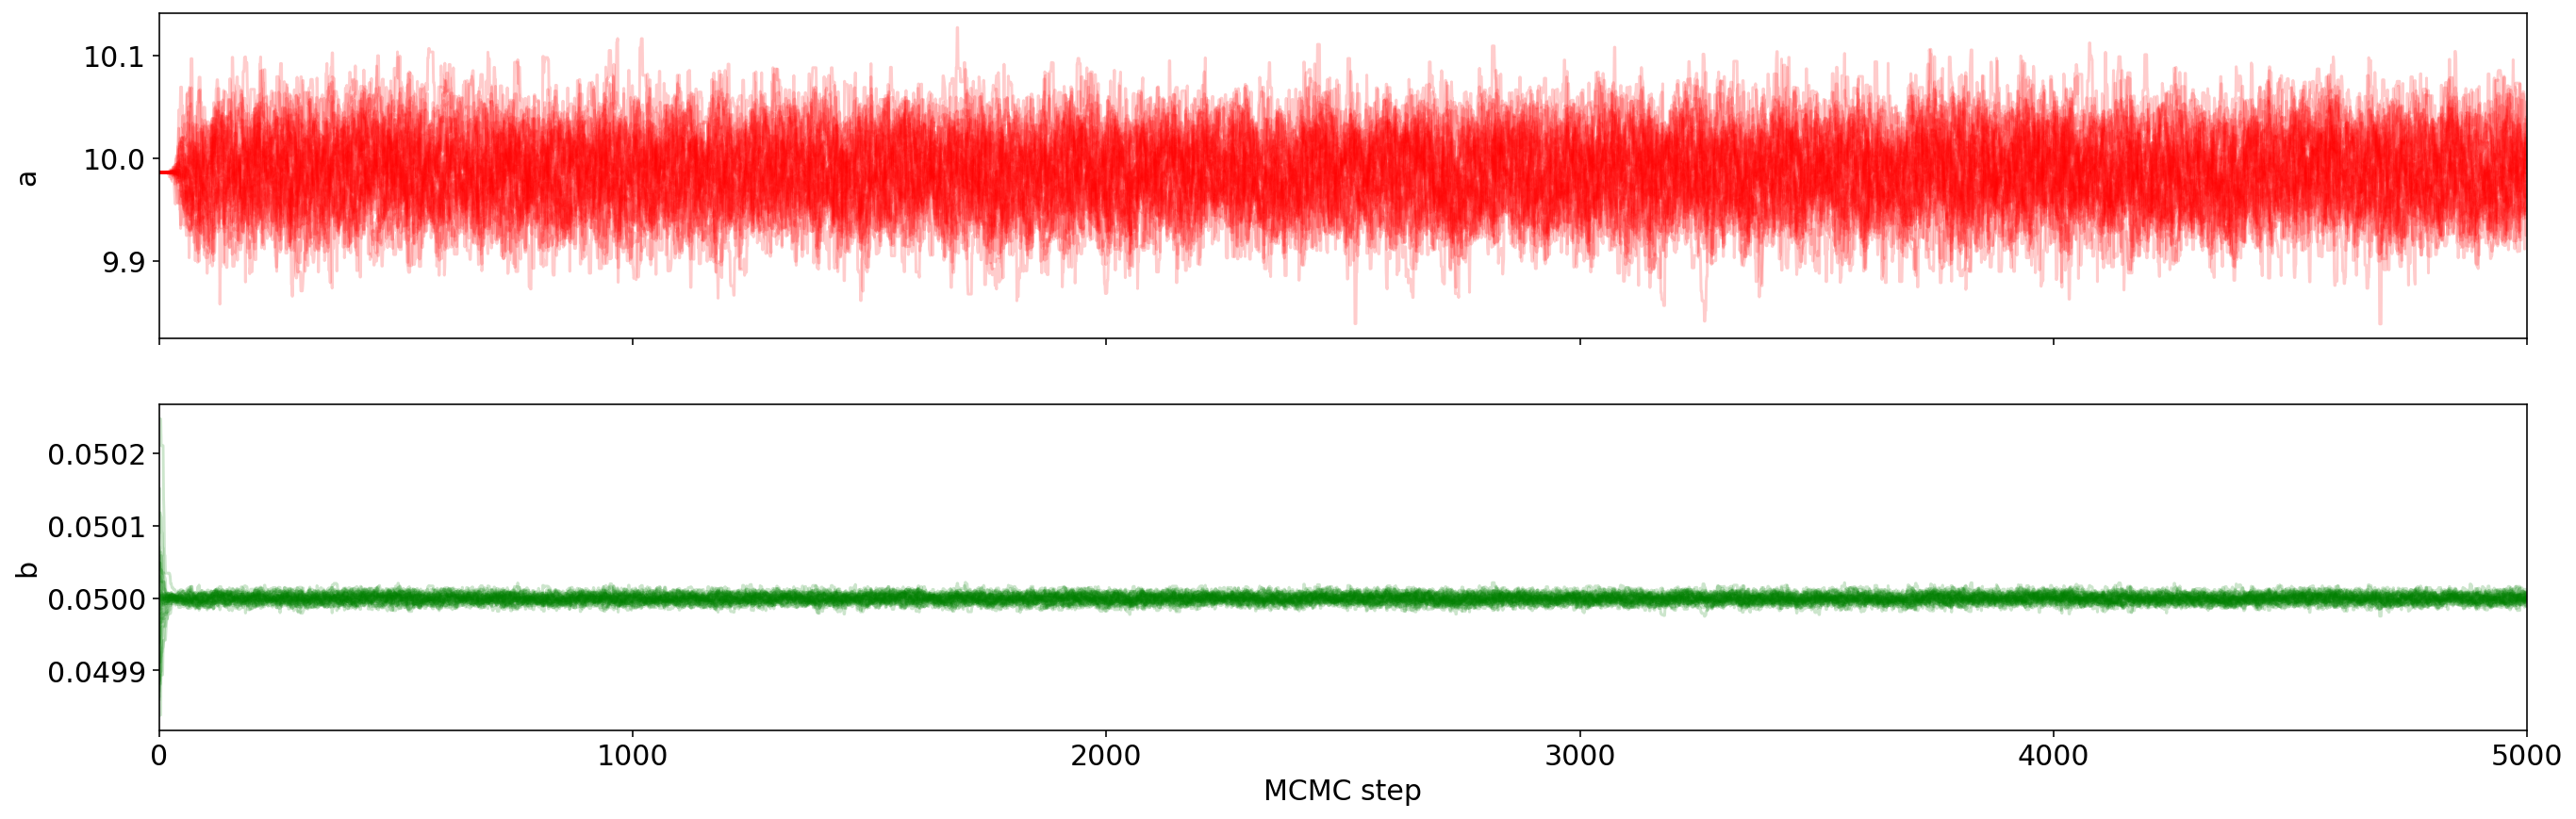

In [56]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.rc('font', size=15) 
fig, axes = plt.subplots(2, figsize=(22.5, 7), sharex=True)

samples = sampler.get_chain()
labels = ["a", "b"]
col = ['r', 'g']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], col[i], alpha=0.2)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.05, 0.5)

axes[-1].set_xlabel("MCMC step")

# Per salvare il grafico
plt.savefig('time_series_chain_parameters.pdf')
#files.download('time_series_chain_parameters.pdf') # Se lo si vuole scaricare

I camminatori iniziano in una piccola distribuzione intorno al massimo di (log) della funzione di massimo verosimiglianza, per poi vagare e iniziare ad esplorare per intero la distribuzione a posteriori.

Dopo poco più di 50 passi, i campioni sembrano “[belli rodati](https://it.wikipedia.org/wiki/Burn-in)” (cioè molto correlati). È molto difficile definire questa ciò quantitativamente, ma una stima del tempo di autocorrelazione

In [57]:
tau = sampler.get_autocorr_time()
print(tau)

[27.97252405 27.24992011]


ci suggerisce che questi sono i passi necessari affinchè la catena "dimentichi" da dove è iniziata (fase di equilibratura). È ragionevole quindi buttare via un multiplo di questo valore, considerandoli come "rodati".

Scartiamo i primi 100 passi, poi scartiamo un passo con cadenza pari a metà del tempo di autocorrelazione (lo spessore o *thin*) e appiattiamo (cioè uniamo, *to flat*) la catena in modo che abbiamo un'unica lista di campioni:

In [58]:
disc = 100
passo = int(tau[0]/2)
flat_samples = sampler.get_chain(discard=disc, thin=passo, flat=True)
print(flat_samples.shape)
print(r'({0:d}-{1:d})/{2:d}*{3:d} = {4:d}, dim = {5:d}'.format(nmcmc, disc, passo, nwalkers, flat_samples.shape[0], flat_samples.shape[1]))

(12032, 2)
(5000-100)/13*32 = 12032, dim = 2


Ora facciamo un [**corner plot**](https://corner.readthedocs.io/en/latest/), che sarebbe un tipo di plot relazionato con i calcoli di MCMC: esso proietta tutti i campioni in tutti i sottospazi 1D e 2D possibili e ci fa sopra un istogramma. **Ciò ci fornisce tutte le proiezioni uni e bidimensionali della distribuzione di probabilità a posteriori** di parametri che stiamo inferendo. Ci va federe tutte le covarianze tra i nostri parametri.

In [59]:
!pip install corner

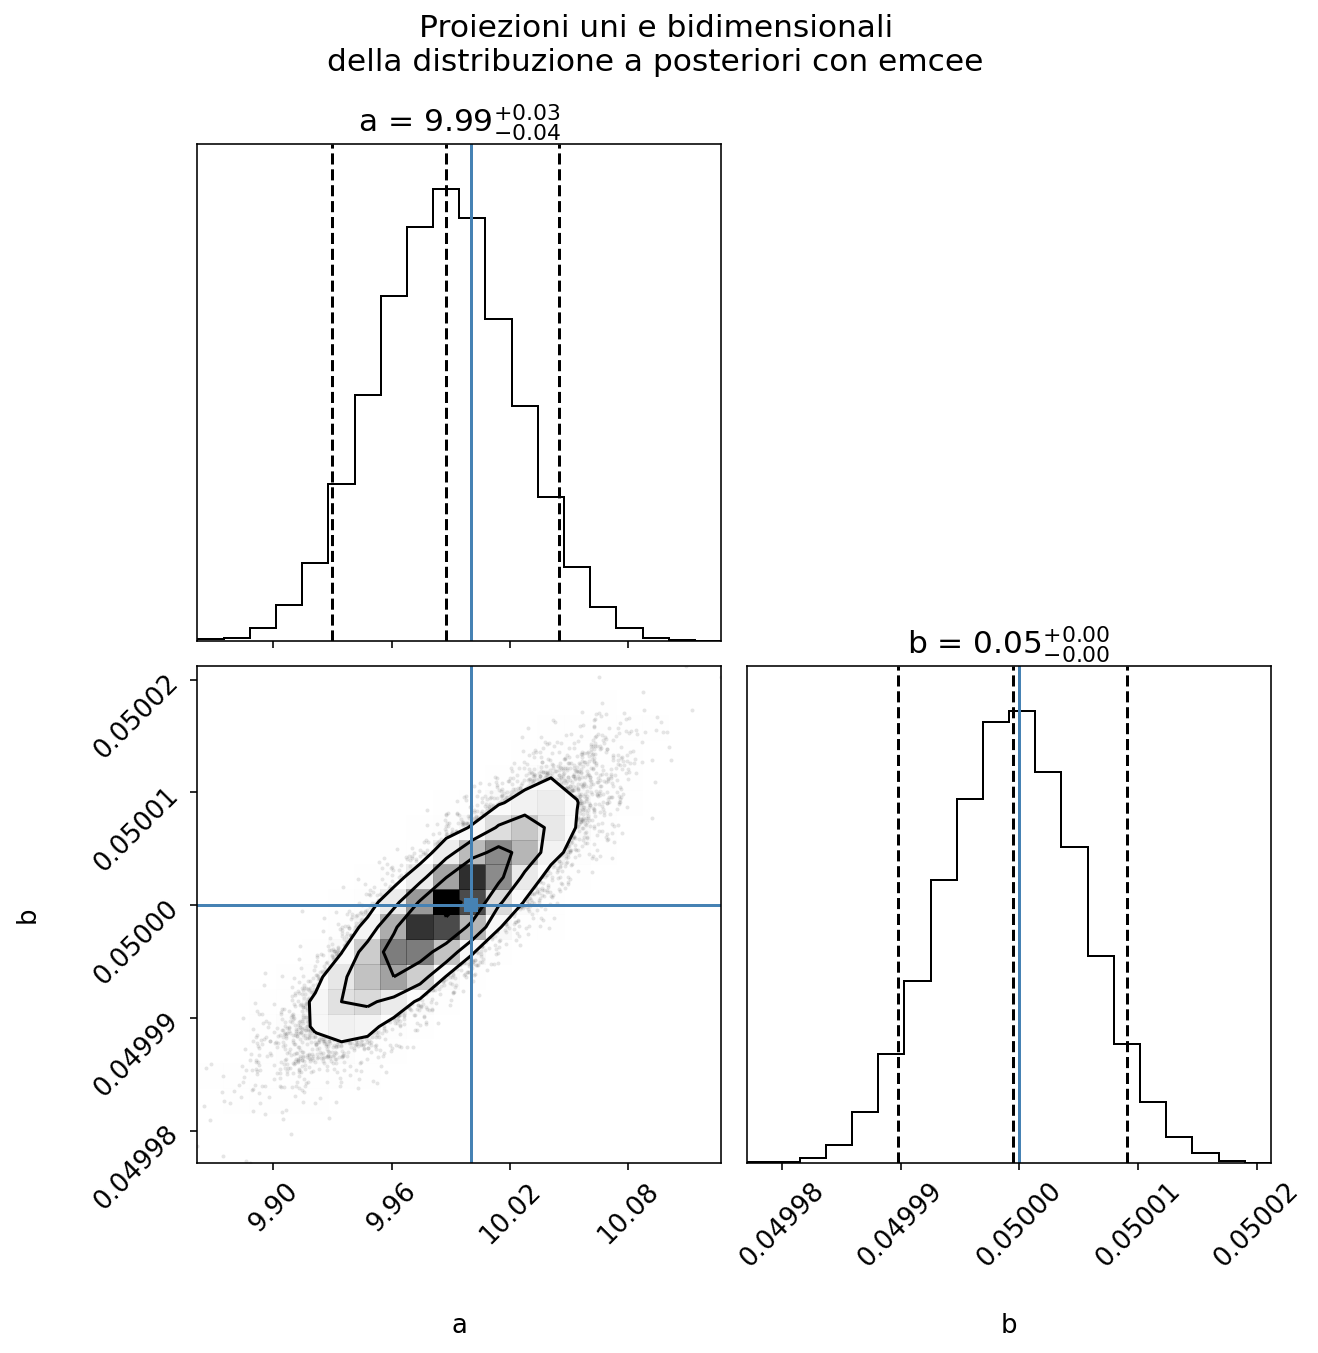

In [60]:
import corner

%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.rc('font', size=13) 

fig = corner.corner(flat_samples, labels=labels, truths=[a0, b0], quantiles=[0.05, 0.5, 0.95], show_titles=True)
fig.suptitle("Proiezioni uni e bidimensionali\ndella distribuzione a posteriori con emcee")
fig.subplots_adjust(top=0.89)
fig.set_figwidth(10)
fig.set_figheight(10)

# Per salvare il grafico
plt.savefig('MCMC_corner_plot.pdf')
# files.download('MCMC_corner_plot.pdf') # Se lo si vuole scaricare

Un altro grafico di diagnostica è la proiezione dei risultati nello spazio dei dati osservati. Prendiamo alcuni campioni (1000 nel nostro caso) dalla catena e sovrapponiamoli ai dati.

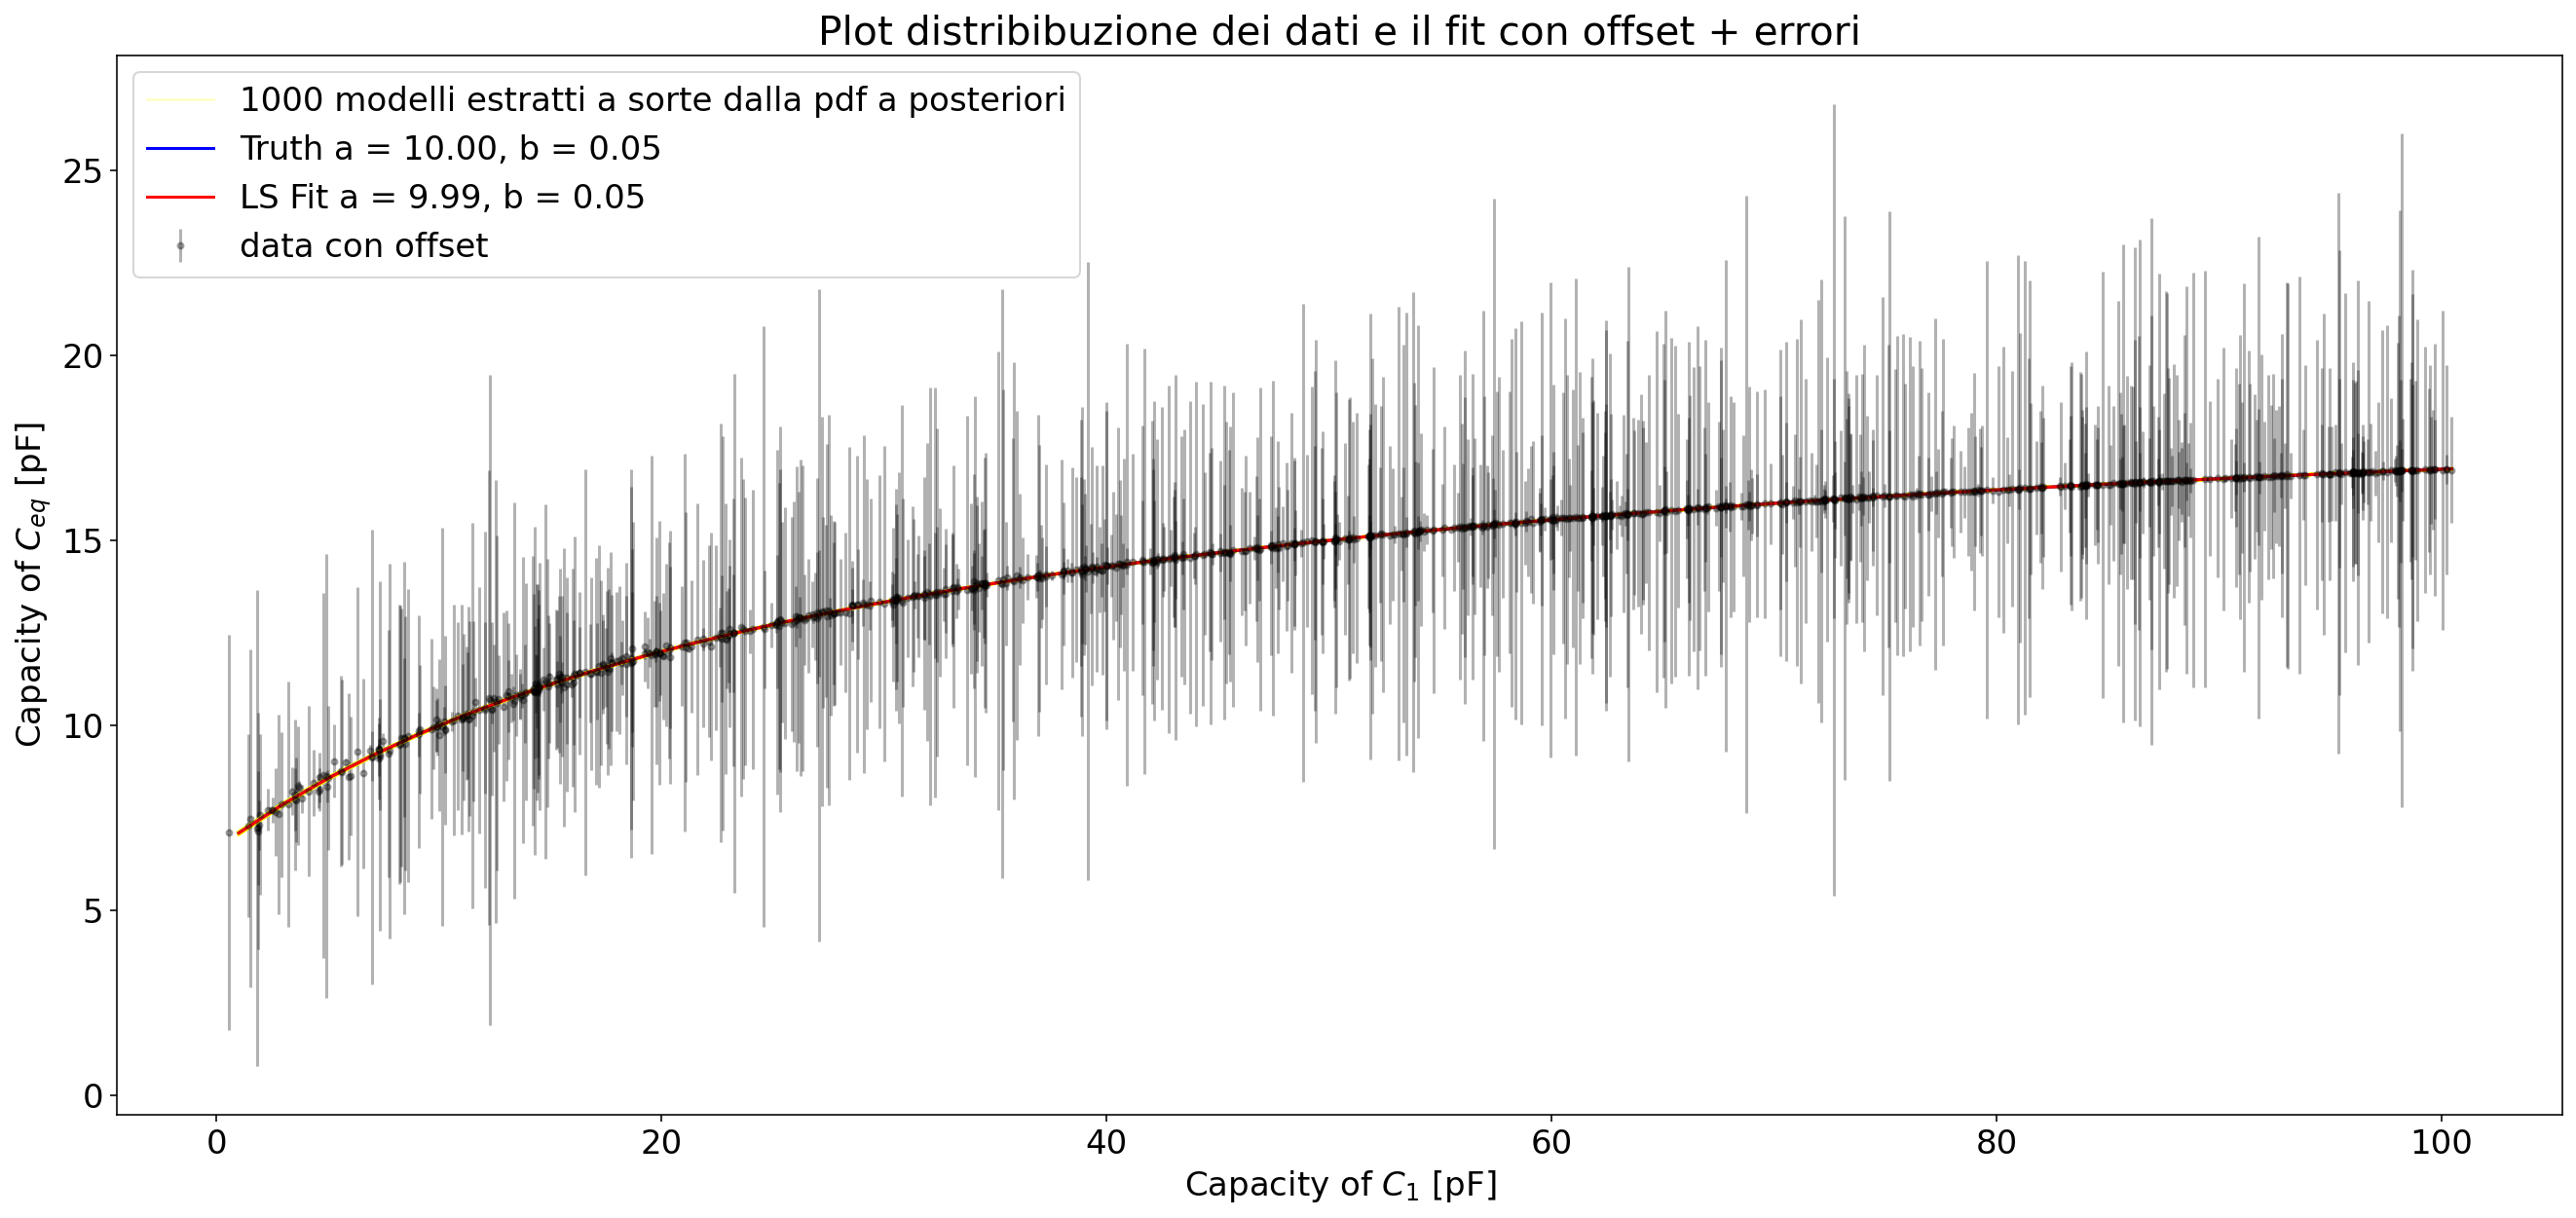

<Figure size 432x288 with 0 Axes>

In [61]:
N_samples = 1e3
inds = np.random.randint(len(flat_samples), size=int(N_samples))

%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(22.5,10))
plt.rc('font', size=17) 
x0 = np.linspace(1,C1_off.max())

for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, func(x0, sample[0], sample[1]), "C1", alpha=0.15, color="yellow")
    if ind == inds[len(inds)-1]:
      plt.plot(x0, func(x0, sample[0], sample[1]), "C1", alpha=0.2, color="yellow", label = "%.f modelli estratti a sorte dalla pdf a posteriori" % (N_samples))

plt.errorbar(C1_off, Ceq, yerr=C_err, fmt=".k", capsize=0, alpha = 0.3, label = "data con offset")
plt.plot(x0, func(x0, a0, b0), label = "Truth a = %.2f, b = %.2f"  % tuple(pars_no_off), color = "blue")
plt.plot(x0, func(x0, *pars),  label = "LS Fit a = %.2f, b = %.2f" % tuple(pars),        color = "red")
plt.legend(fontsize=14)
plt.title("Plot distribibuzione dei dati e il fit con offset + errori")
plt.xlabel("Capacity of $C_1$ [pF]")
plt.ylabel('Capacity of $C_{eq}$ [pF]')
plt.legend(loc='upper left')
plt.show()

# Per salvare il grafico
plt.savefig('Fit_MCMC_con_errore.pdf')
# files.download('Fit_MCMC_con_errore.pdf') # Se lo si vuole scaricare

##### **Intervalli di credibilità**

Scegliamo un intervallo di credibilità del 90% attorno al valore medio. Abbiamo dunque bisogno del 5°, 50° e 90° percentile dei campioni nella distribuzione marginalizzata.

In [62]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [5, 50, 95]) # [ _, central_interval, _]
    interval = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], interval[0], interval[1], labels[i])
    display(Math(txt))

print("Come promemoria:\n1) valori attesi:")
print("\ta = {0:.2f} pF".format(a0))
print("\tb = {0:.3f} pF^-1".format(b0))

print("2) massima verosimiglianza:")
print("\ta = {0:.3f} pF".format(a_ml))
print("\tb = {0:.3f} pF^-1".format(b_ml))

print("3) minimi quadrati:")
print("\ta = ({0:.3f} +/-{1:.3f}) pF ".format(pars[0], pars_cov[0, 0]**0.5))
print("\tb = ({0:.3f} +/-{1:.3f}) pF^-1".format(pars[1], pars_cov[1, 1]**0.5))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Come promemoria:
1) valori attesi:
	a = 10.00 pF
	b = 0.050 pF^-1
2) massima verosimiglianza:
	a = 9.986 pF
	b = 0.050 pF^-1
3) minimi quadrati:
	a = (9.987 +/-0.014) pF 
	b = (0.050 +/-0.000) pF^-1


### PYMC
Come con emcee, dobbiamo
1. impostare il calcolo (cioè il modello di inferenza)
2. eseguire il campionamento
3. guardare i risultati

Il modello PyMC è definito esclusivamente in termini di oggetti indicati come `stochastici` (in senso bayesiano, sono variabili casuali). Ai due parametri vengono assegnati priori uniformi (potrebbero essere utilizzati altri priori più complicati).

In [63]:
!pip install pymc
import pymc

##### 1. Modello di inferenza

In [64]:
# Definisco i parametri con le loro relative distribuzioni a priori
# Dovrei usare Jeffrey's prior per conoscere l'ordine di grandezza
a = pymc.Uniform('a', 5, 15, value=soln.x[0])
b = pymc.Uniform('b', 0.01, 0.1, value=soln.x[1])

Definiamo il modello come un funzione di Python con uno spaciale **decoratore**: `pymc.deterministic`. Questo dice a PyMC che il `model` è una funzione che dipende da degli oggetti stocastici, ma è essa stessa una funzione deterministica degli stessi (è una funzione di variabili aleatorie, non essa stessa una variabile aleatoria).

In [65]:
# Now define the model
@pymc.deterministic
def model(a=a, b=b, x=C1_off):
    return 1 / (1/(x+a)+b)

Lo stesso è vero per la funzione `tau` che converte la varianza in un parametro di precisione.

In [66]:
# pymc parametrizza l'ampiezza della distribuzione gaussiana con tau=1/sigma**2
@pymc.deterministic
def tau(yerr=C_err, model=model):
    return np.power(yerr**2, -1)

L'ultima istruzione deve anche informare PyMC dei dati. Per fare ciò nel prossimo comando dichiariamo che i dati osservati sono presi da una distribuzione normale con media (`mu`) uguale al metodo `model`, con una precisione (`tau`) uguale al metodo `tau` e `value` uguale ai dati osservati `Ceq`. La specifica `observed=True` dice a PyMC che quest'ultimo valore `stochastic` dovrebbe rimanere costante.

In [67]:
# Lastly relate the model/parameters to the data
data = pymc.Normal('data', mu=model, tau=tau, value=Ceq, observed=True)

##### 2. Campionamento

In [68]:
# Definisco un campionamento (l'algoritmo predefinito è quello di Metropolis-Hastings) e lo giro
nsampler = 20000
sampler = pymc.MCMC([a, b, model, C_err, Ceq, C1_off])
sampler.sample(iter=nsampler)

 [-----------------100%-----------------] 20000 of 20000 complete in 8.0 sec

##### 3. Risultati

Plotting b
Plotting a


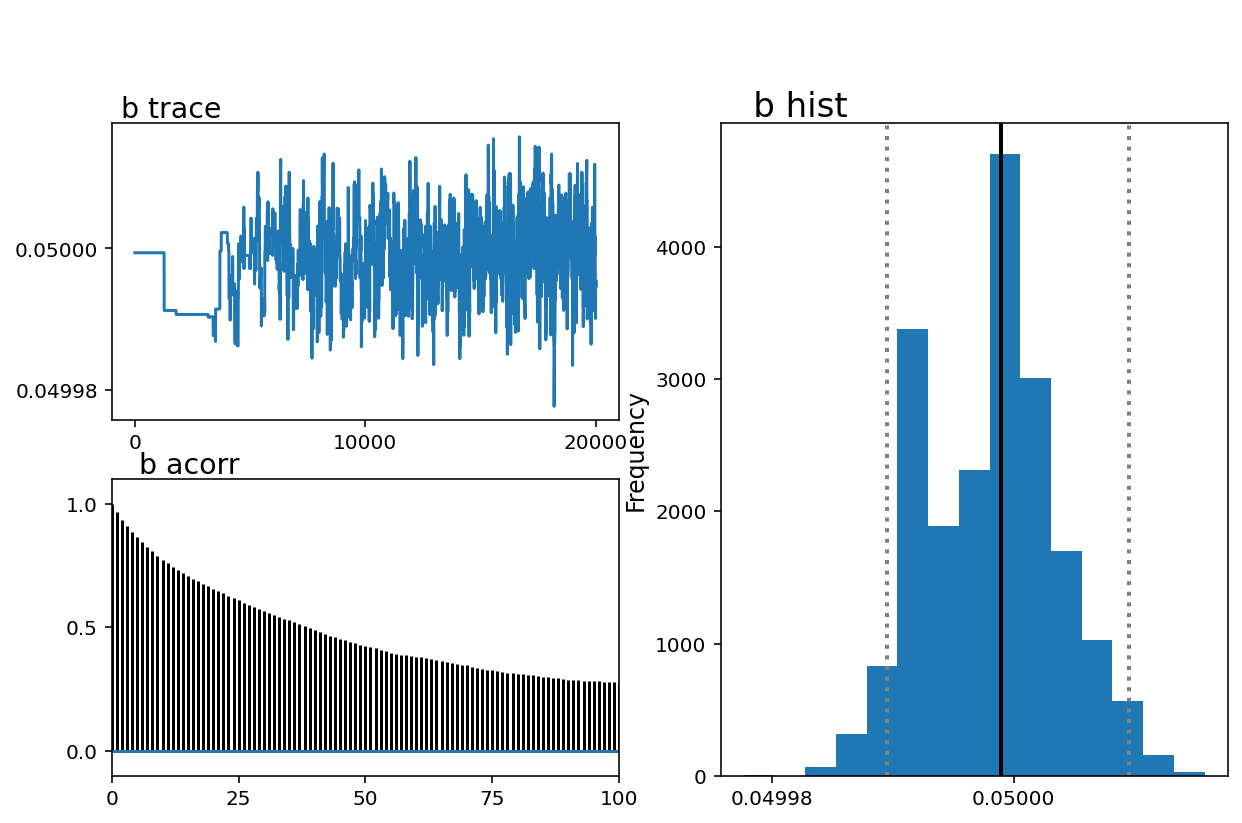

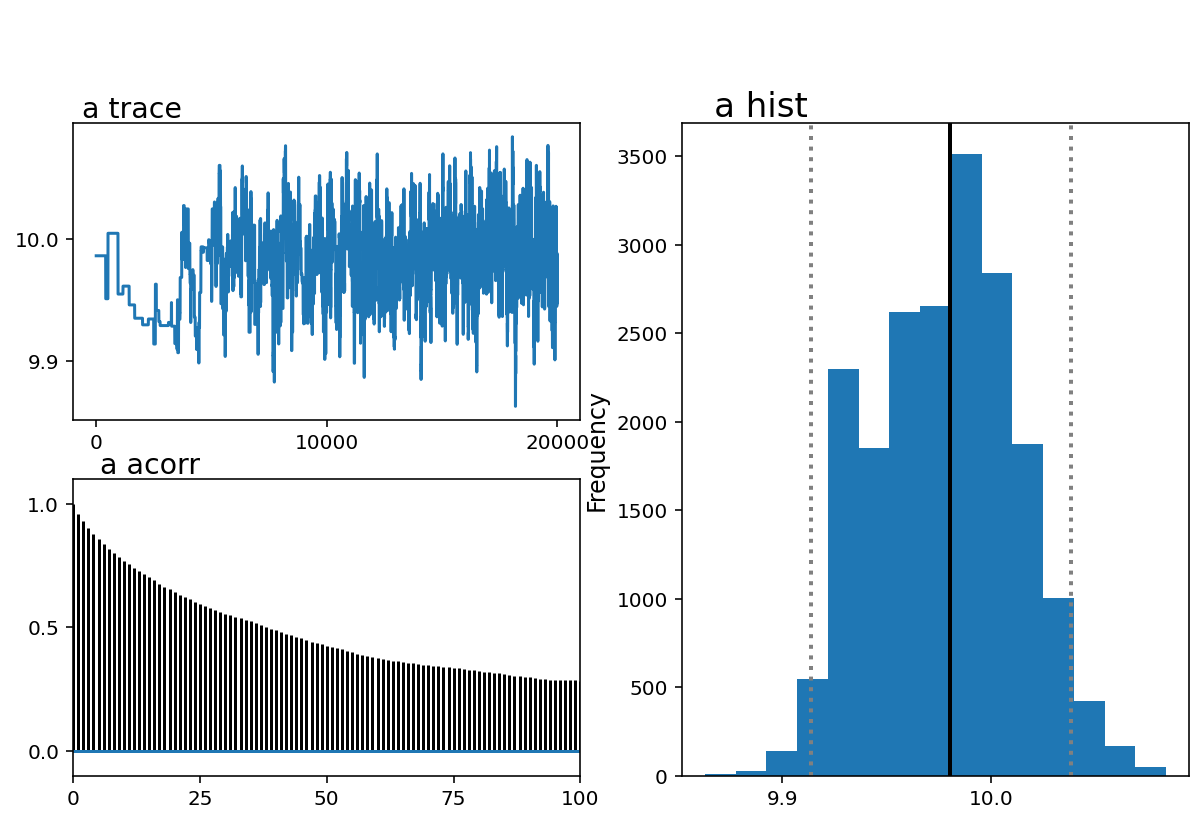

In [69]:
pymc.Matplot.plot(sampler)
# Per salvare il grafico
plt.savefig('PyMC.pdf')
# files.download('PyMC.pdf') # Se lo si vuole scaricare

Per ogni parametro `stochastico`, PyMC grafica la traccia (pannello superiore sinistro), l'autocorrelazione (pannello inferiore sinistro, che mi spetto tenda a zero) e l'istogramma del campione (pannello destro).

In [70]:
a.summary()
b.summary()


a:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	9.978            0.034            0.002            [ 9.914 10.039]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	9.917            9.953           9.98           10.002        10.045
	

b:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.05             0.0              0.0                  [0.05 0.05]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.05             0.05            0.05           0.05          0.05
	


Per ottenere la distribuzione a posteriori usiamo nuovamente un corner plot: passiamo a `corner.corner` can (`traccia`) della catena di ogni parametro, rappruppata in un array NumPy trasposto (cioè`(nsampler, ndim)` invece dell'originale `(ndim, nsampler)`)

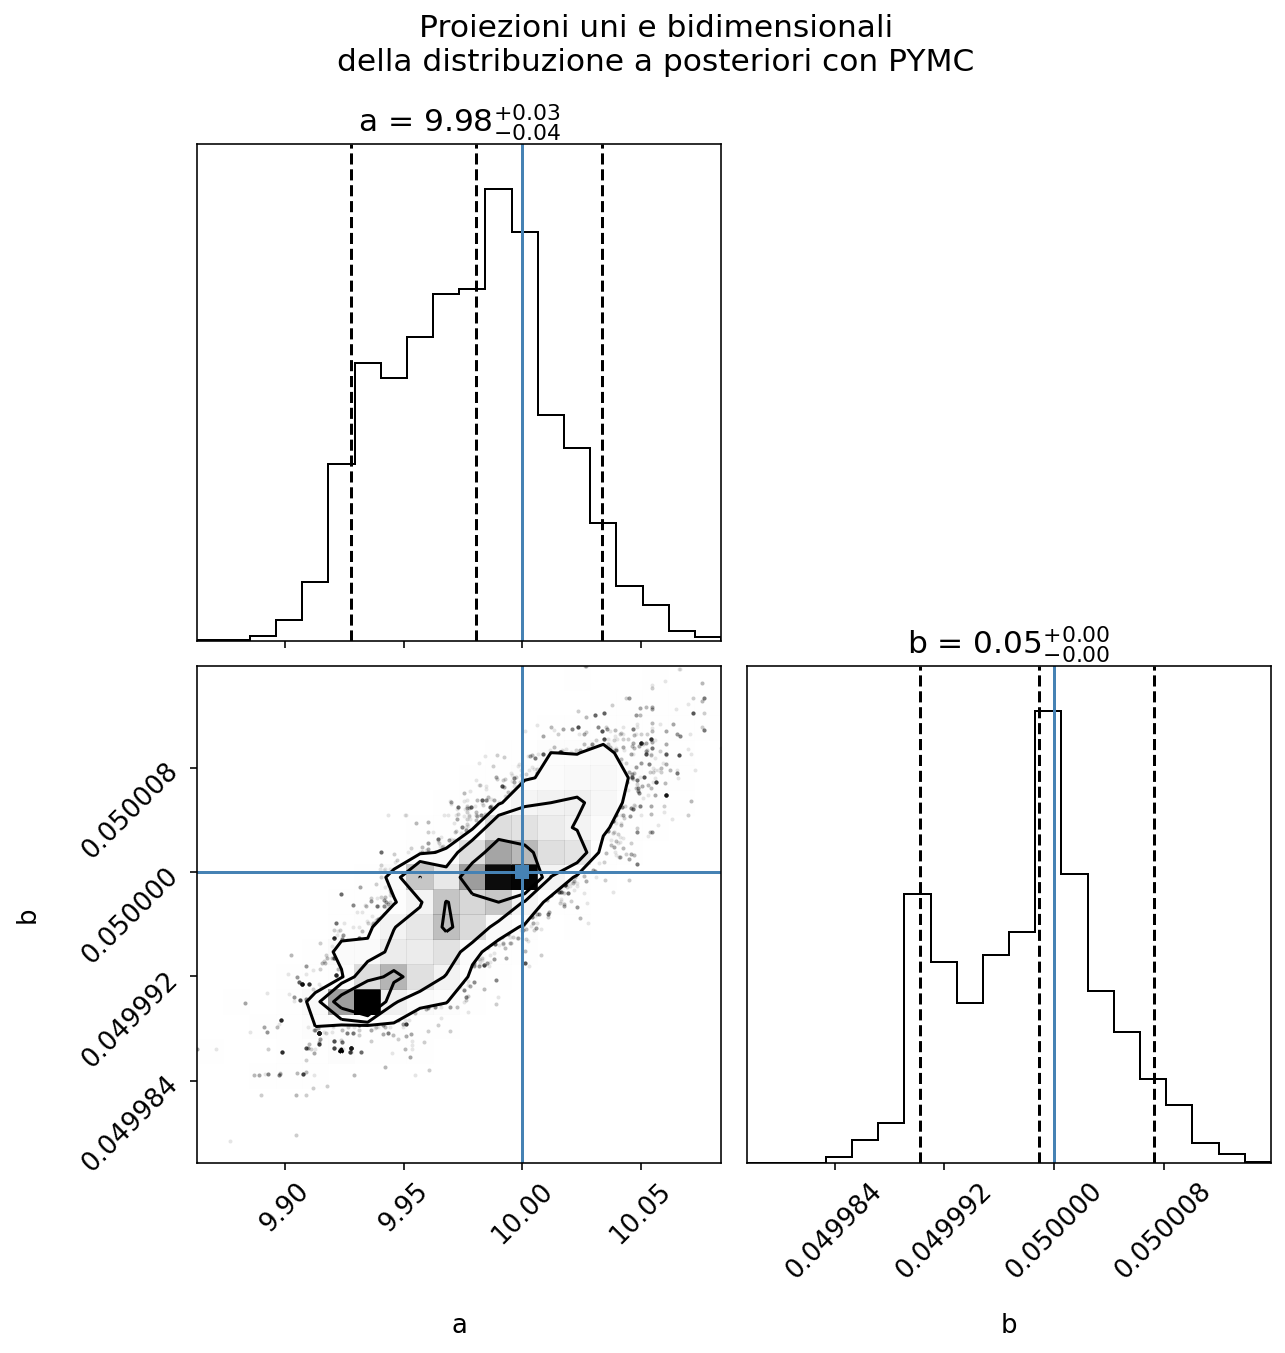

In [71]:
plt.rc('font', size=13) 
samples = np.array([a.trace(), b.trace()]).T
fig = corner.corner(samples[:,:], labels=['a', 'b'], truths=[a0, b0], quantiles=[0.05, 0.5, 0.95], show_titles=True)
fig.suptitle("Proiezioni uni e bidimensionali\ndella distribuzione a posteriori con PYMC")
fig.subplots_adjust(top=0.89)
fig.set_figwidth(10)
fig.set_figheight(10)

# Per salvare il grafico
plt.savefig('PyMC_corner_plot.pdf')
# files.download('PyMC_corner_plot.pdf') # Se lo si vuole scaricare